### Importación de datos de tablas de excel con pandas

In [4]:
import pandas as pd

# importo las tablas de excel donde estan mis sismos (ms) y los del SGC (ss)

ms = pd.read_excel('misSismos.xlsx')
#print (ms) 
ss = pd.read_excel('sgcSismos.xlsx')
#print (ss)
print(ms)

    EVE        DAT              TIM    LAT     LON    DEP  MAG  SIR  DIP  RAK
0     1 2015-01-14  18:51:06.300000  6.823 -73.153  157.8  4.2   28   67 -161
1     2 2015-01-15  21:46:01.100000  6.852 -73.135  143.8  3.5    0   11  118
2     3 2015-01-17  13:38:45.900000  6.797 -73.141  150.4  3.6  148   63   58
3     4 2015-01-21  23:15:20.200000  6.825 -73.139  155.1  3.6   68   82  -61
4     5 2015-01-25  10:15:46.400000  6.830 -73.176  154.9  4.6   78   64 -179
..  ...        ...              ...    ...     ...    ...  ...  ...  ...  ...
94   95 2015-12-07  19:26:33.100000  6.855 -73.124  154.0  3.4  104   38   38
95   96 2015-12-09  18:10:22.900000  6.821 -73.138  151.4  4.0   75   69   78
96   97 2015-12-24  19:13:56.800000  6.821 -73.154  147.4  3.6   46   78 -141
97   98 2015-12-26  13:04:59.500000  6.831 -73.136  152.4  4.2   48   43  156
98   99 2015-12-29  20:10:57.600000  6.803 -73.144  139.2  3.6  148   76   18

[99 rows x 10 columns]


### Lectura de las columnas necesarias de los exceles importados como dataframes

In [5]:
import numpy as np

# Selecciono los datos a usar de latitud, longitud, profundidad, magnitud
# tanto los picados por mi (ms) como los picados por el servicio (ss)

lats = np.asarray(ss['LAT'])
lons = np.asarray(ss['LON'])
latm = np.asarray(ms['LAT'])
lonm = np.asarray(ms['LON'])
magm = np.asarray(ms['MAG'])
depm = np.asarray(ms['DEP'])

# se importa fecha y hora, para mostrar en el video y organizar las imagenes

fecham = np.asarray(ms['DAT'])
horam = np.asarray(ms['TIM'])

stir = str(horam[2])
stir = stir.replace(':','-',1)
stir2 = str(fecham[2])
#prueba del formato de fecha con hora y minutos

print(stir2[:10]+'h'+stir[:5])

2015-01-17h13-38


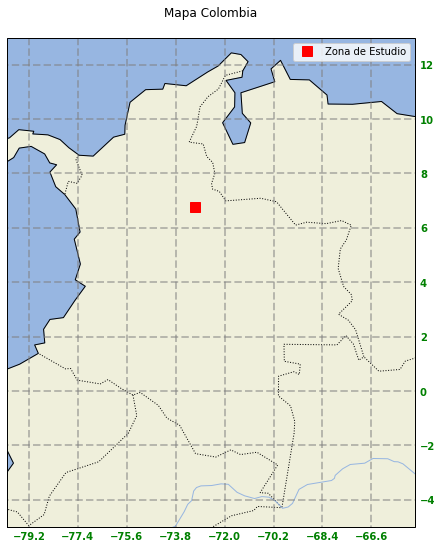

In [115]:
# mapa general de la zona
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker





%matplotlib inline
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_extent([-65, -80, -5, 13])

ax.coastlines()
san_lon, san_lat = -73.1023, 6.7557
ax.plot(san_lon,san_lat,'rs', markersize =10, label="Zona de Estudio")


gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlabel_style = {'size': 15, 'color': 'green'}
gl.ylabel_style = {'size': 10, 'color': 'green'}
gl.xlabel_style = {'color': 'green', 'weight': 'bold'}
gl.ylabel_style = {'color': 'green', 'weight': 'bold'}
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS)
ax.legend()
#coord1 = transFigure.transform(ax2.transAxes.transform([0,0]))
ax.set_title("Mapa Colombia\n")
plt.savefig("MapaglobalCartopy.png")
plt.show()

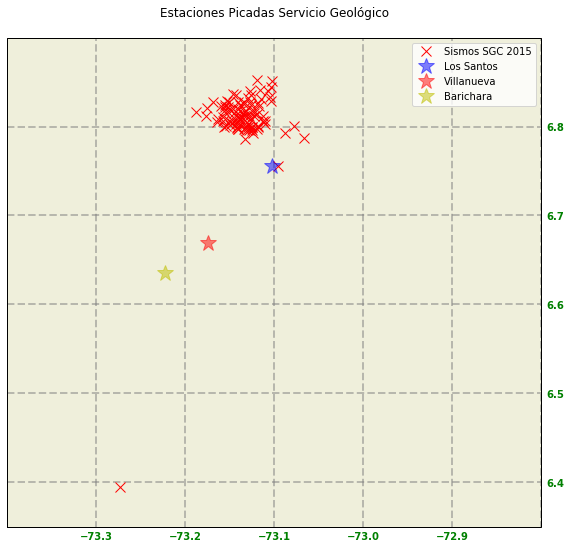

In [88]:
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker





%matplotlib inline
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
#ax.set_extent([-180, 180, -90, 90])
#ax.set_extent([-73.8, -72.8, 6.3, 7.5])
ax.set_extent([-73.4, -72.8, 6.35, 6.9])
#ax.set_extent([-73.2, -73.05, 6.75, 6.9])

ax.coastlines()
ax.plot(lons,lats,'rx', markersize =10, label="Sismos SGC 2015")


gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlabel_style = {'size': 15, 'color': 'green'}
gl.ylabel_style = {'size': 10, 'color': 'green'}
gl.xlabel_style = {'color': 'green', 'weight': 'bold'}
gl.ylabel_style = {'color': 'green', 'weight': 'bold'}

san_lon, san_lat = -73.1023, 6.7557
vill_lon, vill_lat = -73.1740, 6.6695
bar_lon, bar_lat = -73.223, 6.6358

ax.plot(san_lon, san_lat, 'b*', markersize=17, alpha=0.5, label='Los Santos')
ax.plot(vill_lon, vill_lat, 'r*', markersize=17, alpha=0.5, label='Villanueva')
ax.plot(bar_lon, bar_lat, 'y*', markersize=17, alpha=0.5, label='Barichara')

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS)
ax.legend()
#coord1 = transFigure.transform(ax2.transAxes.transform([0,0]))
ax.set_title("Estaciones Picadas Servicio Geológico\n")
plt.savefig("MapaSismosSGC2015.png")
plt.show()



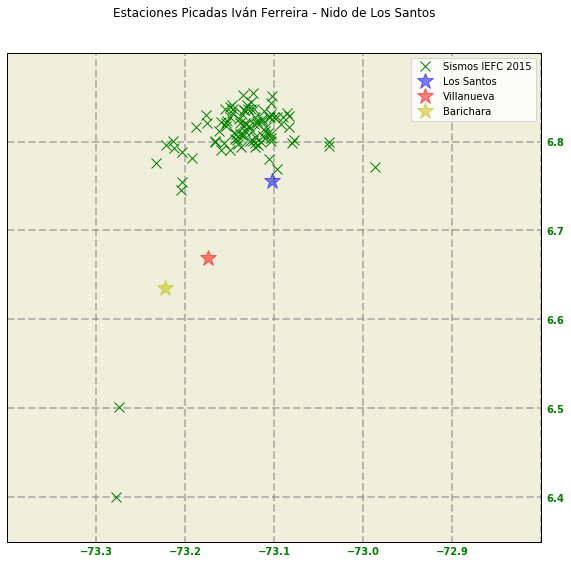

In [89]:

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
#ax.set_extent([-180, 180, -90, 90])
#ax.set_extent([-73.8, -72.8, 6.3, 7.5])
#ax.set_extent([-73.2, -73.05, 6.75, 6.9])
ax.set_extent([-73.4, -72.8, 6.35, 6.9])
ax.coastlines()
ax.plot(lonm,latm,'gx', markersize =10, label='Sismos IEFC 2015')

san_lon, san_lat = -73.1023, 6.7557
vill_lon, vill_lat = -73.1740, 6.6695
bar_lon, bar_lat = -73.223, 6.6358

ax.plot(san_lon, san_lat, 'b*', markersize=17, alpha=0.5, label='Los Santos')
ax.plot(vill_lon, vill_lat, 'r*', markersize=17, alpha=0.5, label='Villanueva')
ax.plot(bar_lon, bar_lat, 'y*', markersize=17, alpha=0.5, label='Barichara')


gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlabel_style = {'size': 15, 'color': 'green'}
gl.ylabel_style = {'size': 10, 'color': 'green'}
gl.xlabel_style = {'color': 'green', 'weight': 'bold'}
gl.ylabel_style = {'color': 'green', 'weight': 'bold'}
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS)
ax.legend()
ax.set_title("Estaciones Picadas Iván Ferreira - Nido de Los Santos\n\n")
plt.savefig("mapaSismosIEFC2015.png")
plt.show()


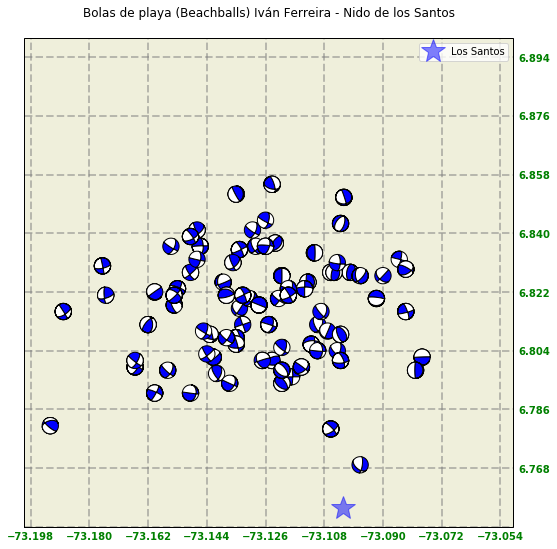

In [116]:
from obspy.imaging.beachball import beach
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import pandas as pd


Strike = ms['SIR']
Dip = ms['DIP']
Rake = ms['RAK']
focmecs=[]

for i in range(0, 99): #cambiar la columa por la adecuada en el excel
   focmecs.append((Strike[i],Dip[i],Rake[i]))    

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
#ax.set_extent([-180, 180, -90, 90])
#ax.set_extent([-73.8, -72.8, 6.3, 7.5])
ax.set_extent([-73.2, -73.05, 6.75, 6.9])



for i in range(len(focmecs)):
    b = beach(focmecs[i], xy=(lonm[i], latm[i]), width=0.005, linewidth=1)
    b.set_zorder(10)
    ax.add_collection(b)

san_lon, san_lat = -73.1023, 6.7557
ax.plot(san_lon, san_lat, 'b*', markersize=25, alpha=0.5, label='Los Santos')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlabel_style = {'size': 15, 'color': 'green'}
gl.ylabel_style = {'size': 10, 'color': 'green'}
gl.xlabel_style = {'color': 'green', 'weight': 'bold'}
gl.ylabel_style = {'color': 'green', 'weight': 'bold'}
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS)

ax.legend()
ax.set_title("Bolas de playa (Beachballs) Iván Ferreira - Nido de los Santos\n")
plt.savefig("Beachballs2015.png")
plt.show()

2015-01-14h18-51


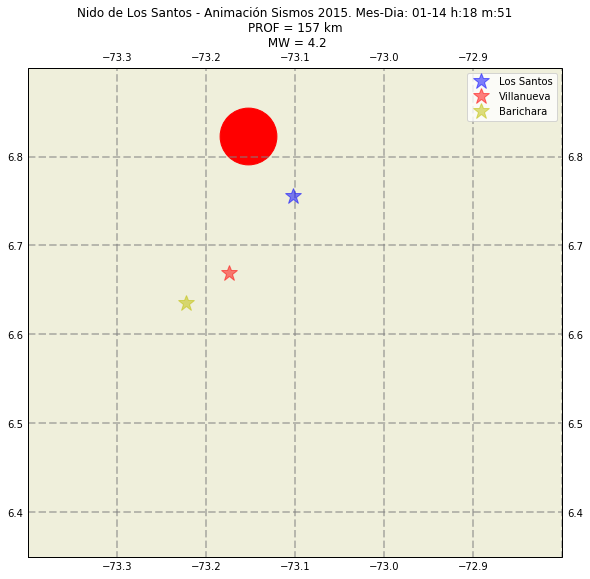

2015-01-15h21-46


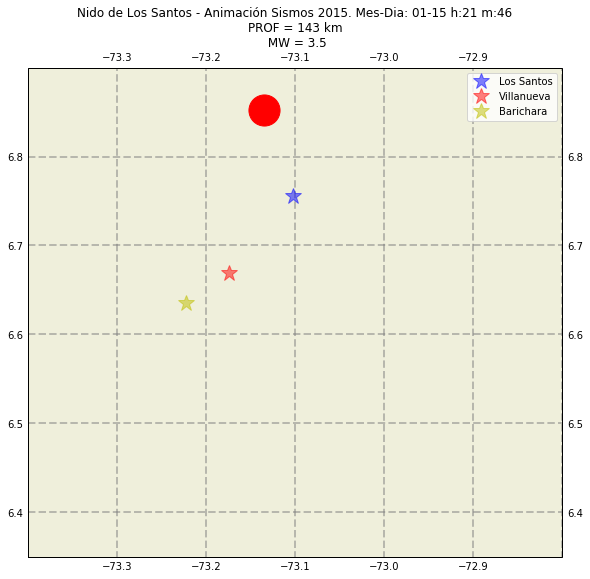

2015-01-17h13-38


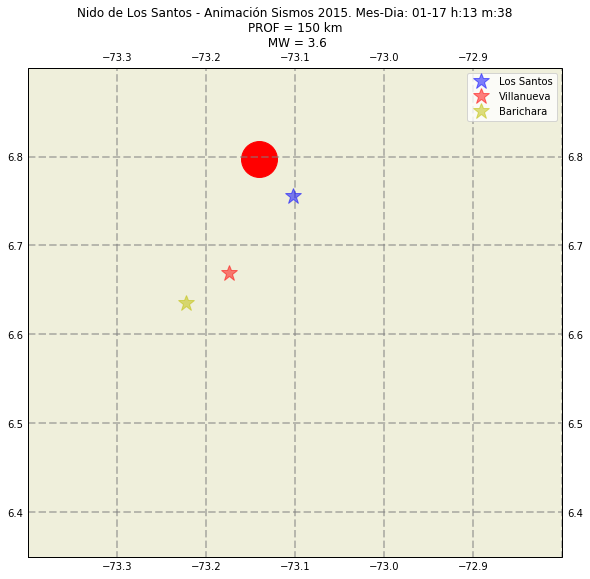

2015-01-21h23-15


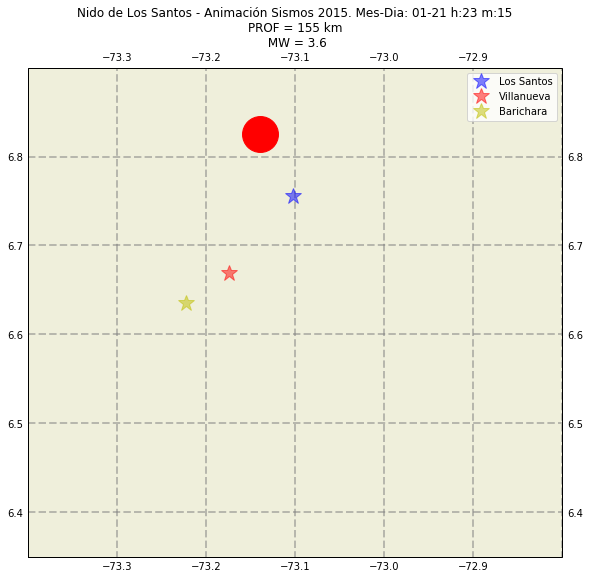

2015-01-25h10-15


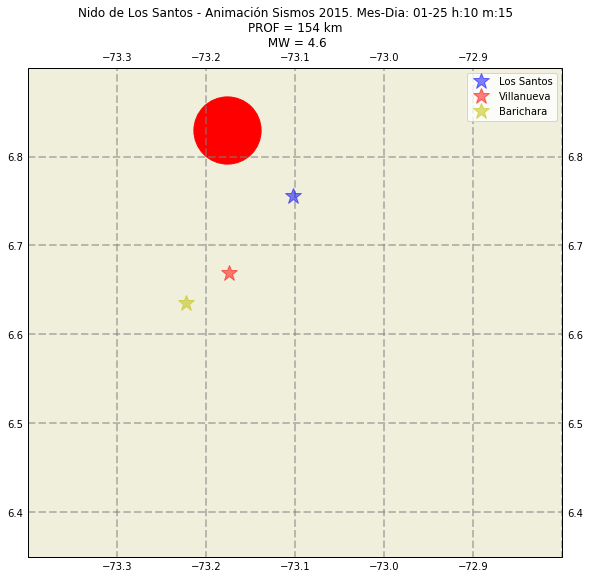

2015-01-29h04-59


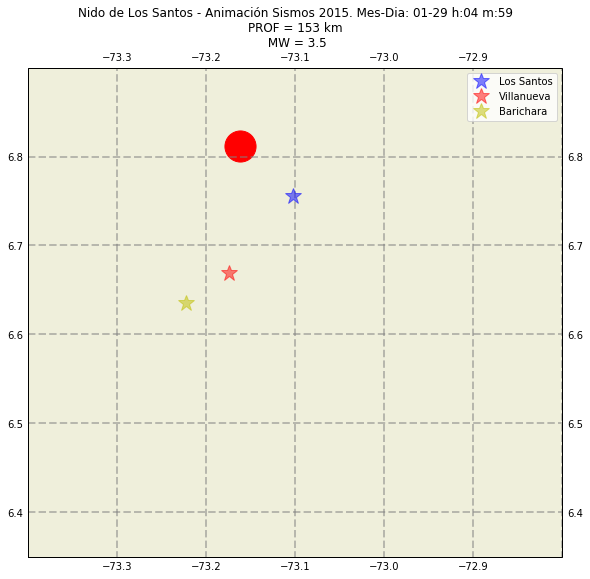

2015-01-29h20-10


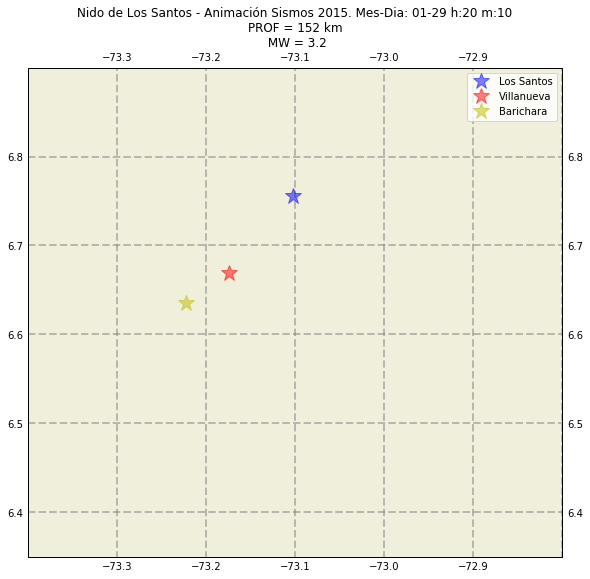

2015-02-06h13-33


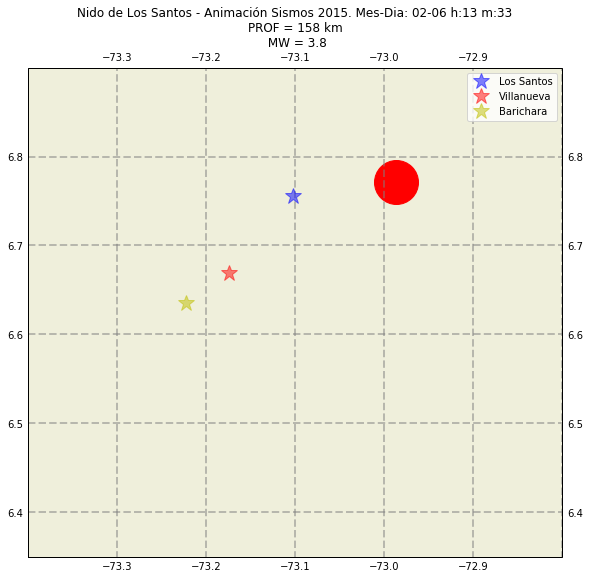

2015-02-13h04-45


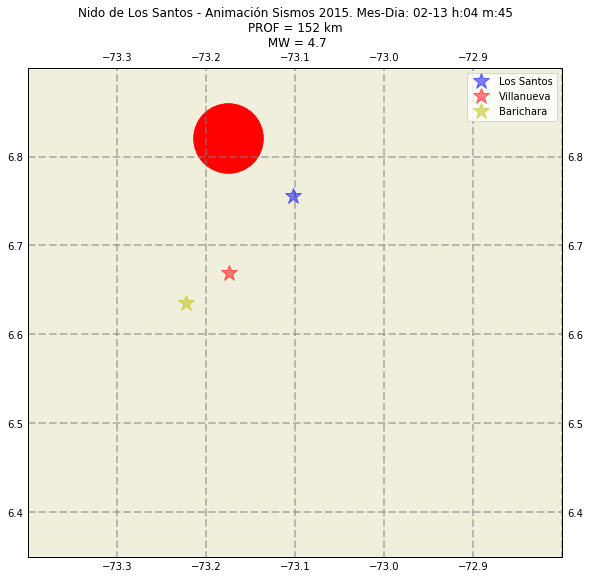

2015-02-13h23-39


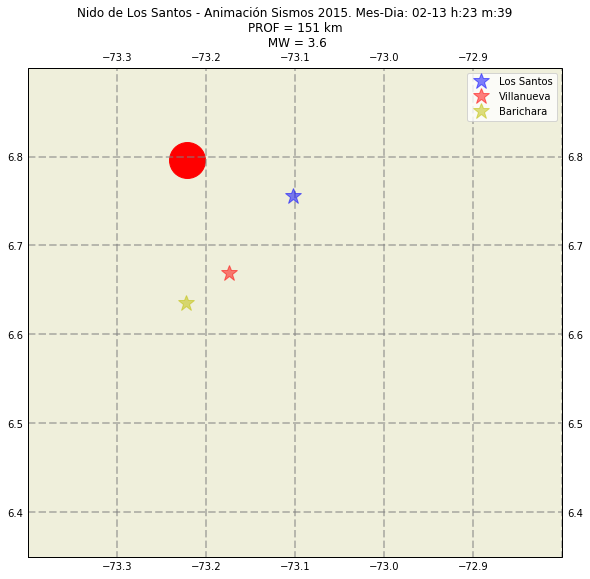

2015-02-20h17-54


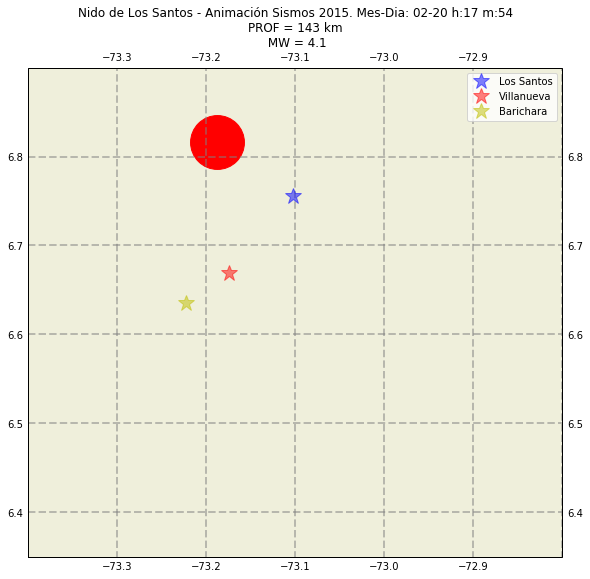

2015-02-21h02-14


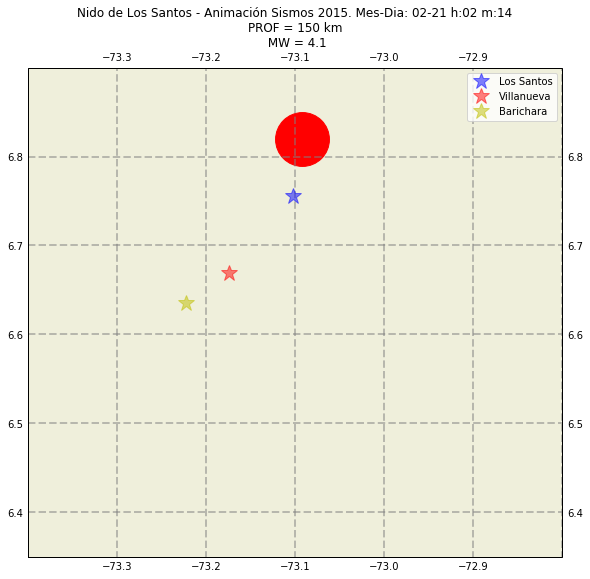

2015-02-24h04-29


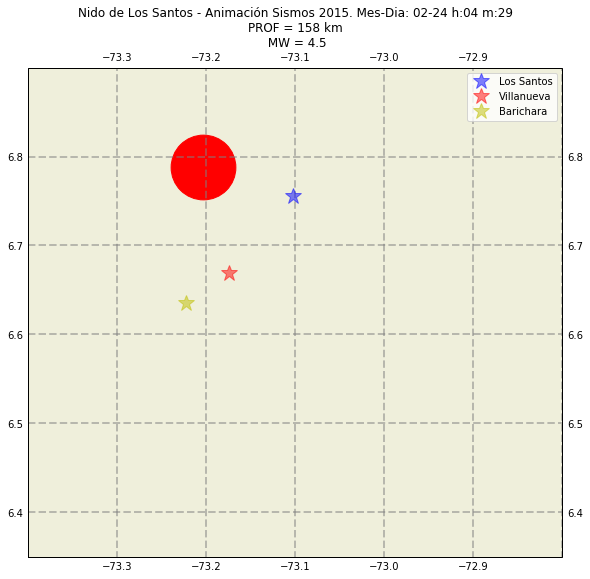

2015-03-02h06-13


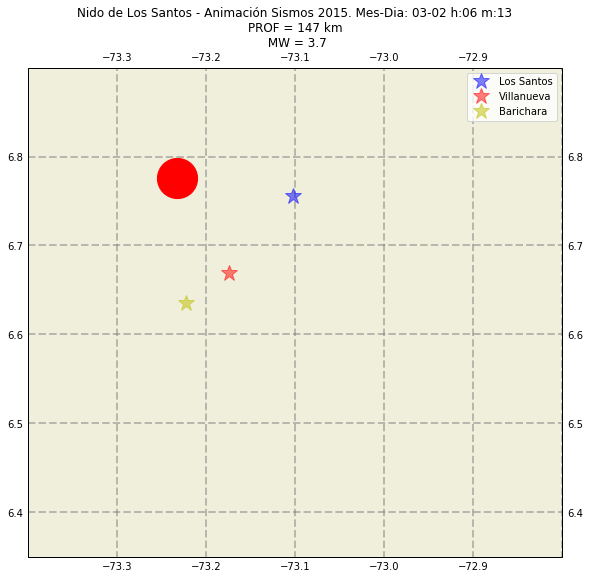

2015-03-04h03-16


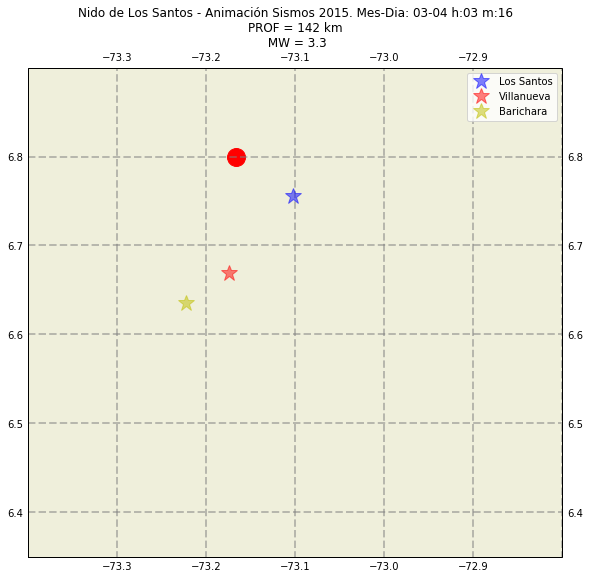

2015-05-03h18-37


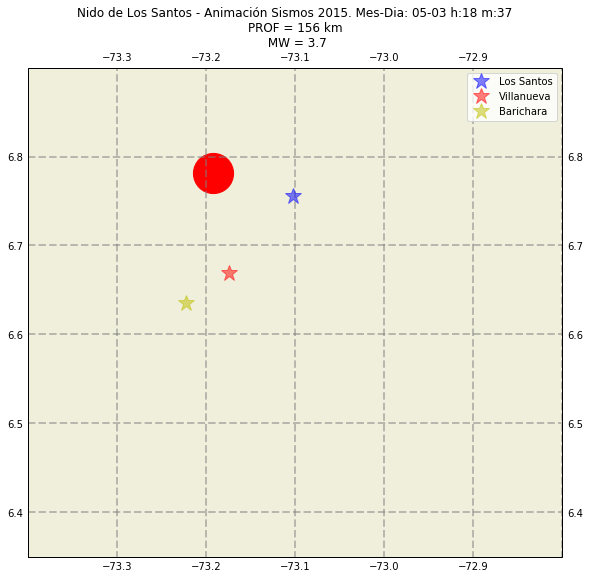

2015-03-08h00-26


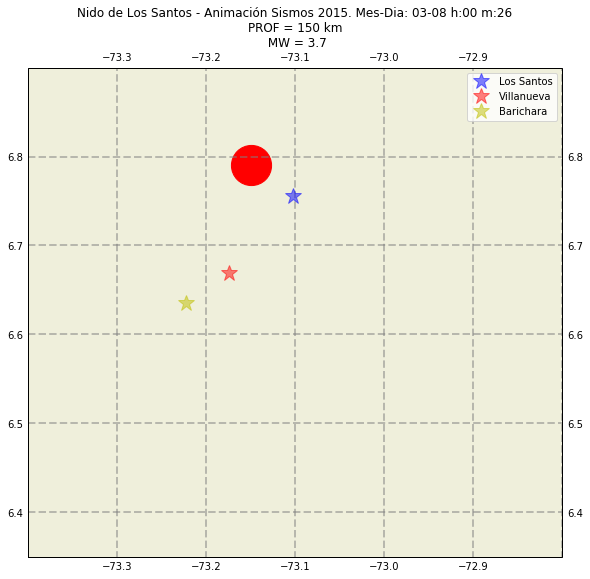

2015-03-10h20-55


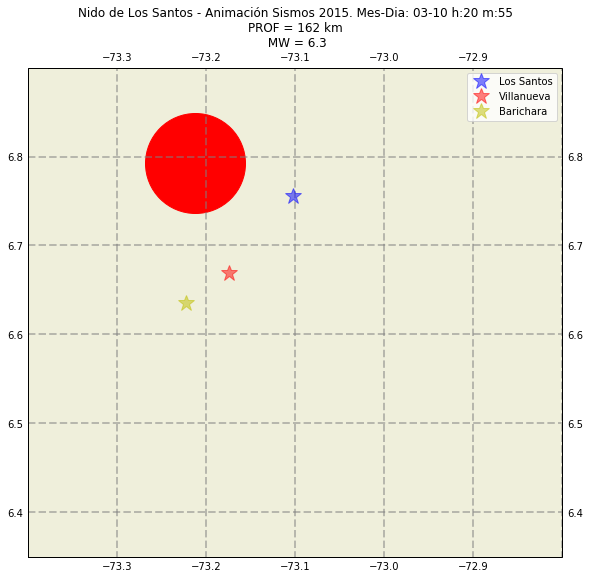

2015-03-11h19-51


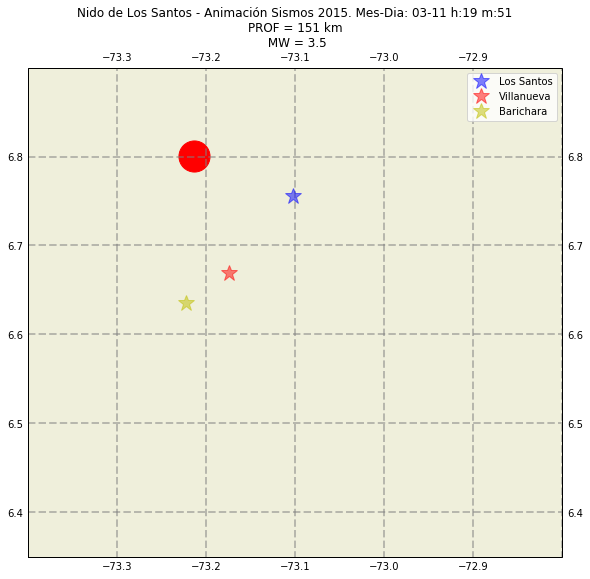

2015-03-14h08-05


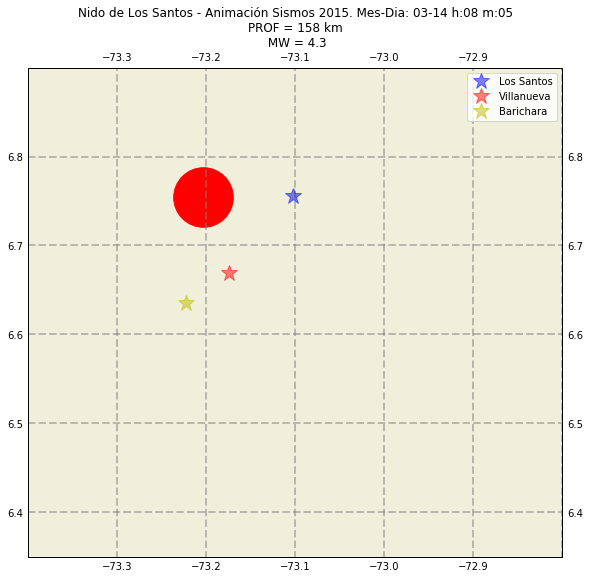

2015-03-21h09-57


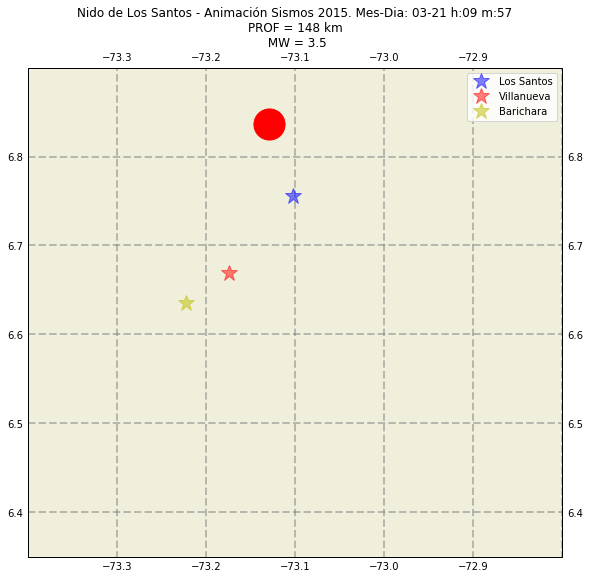

2015-03-22h22-27


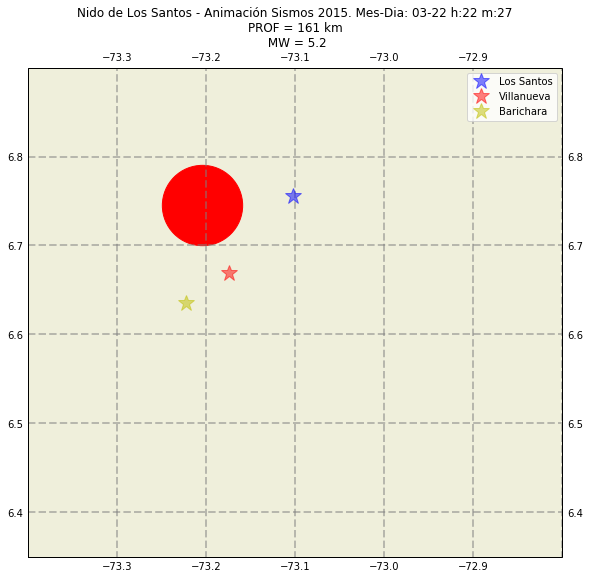

2015-03-24h20-52


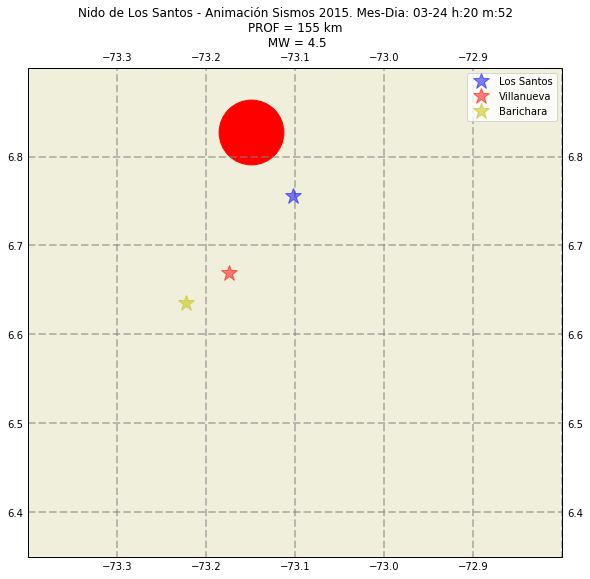

2015-03-25h08-04


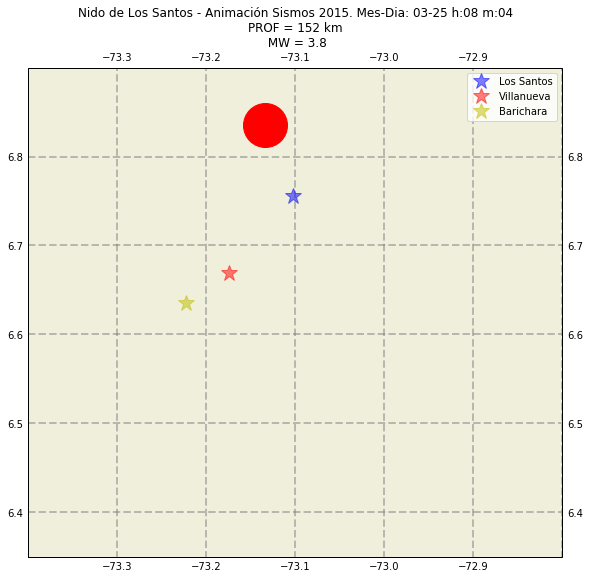

2015-04-06h22-20


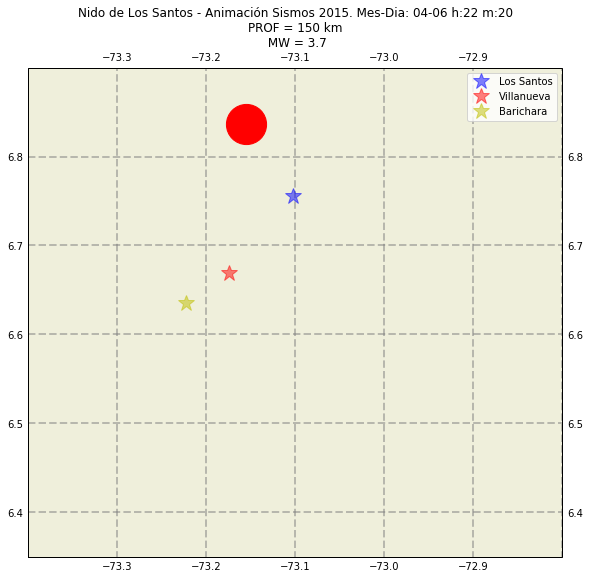

2015-04-07h02-11


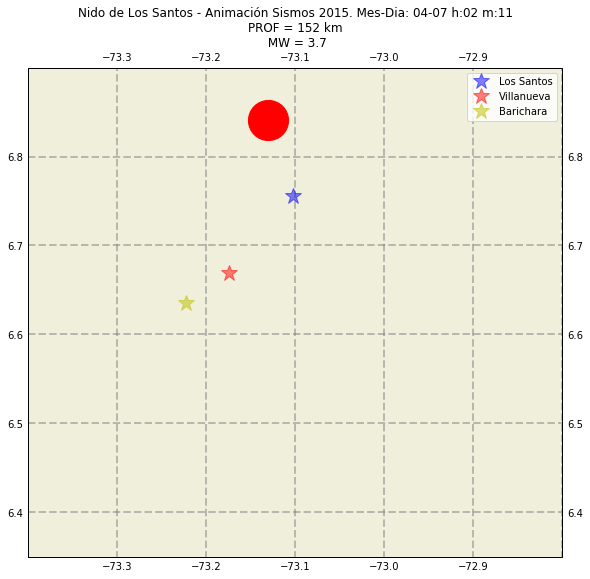

2015-04-11h04-29


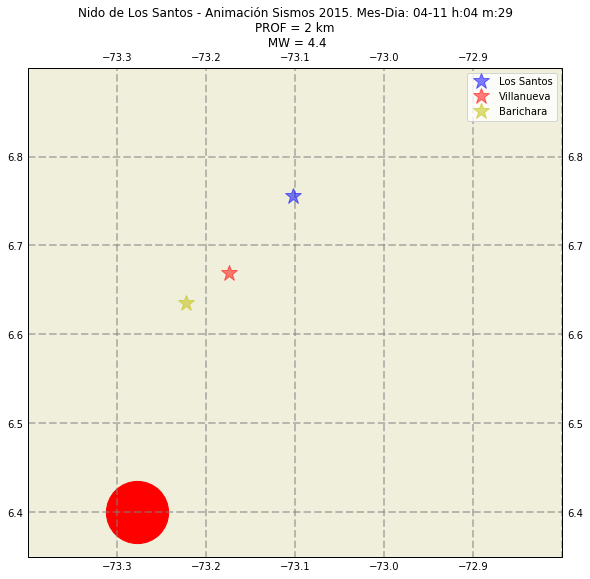

2015-04-12h13-44


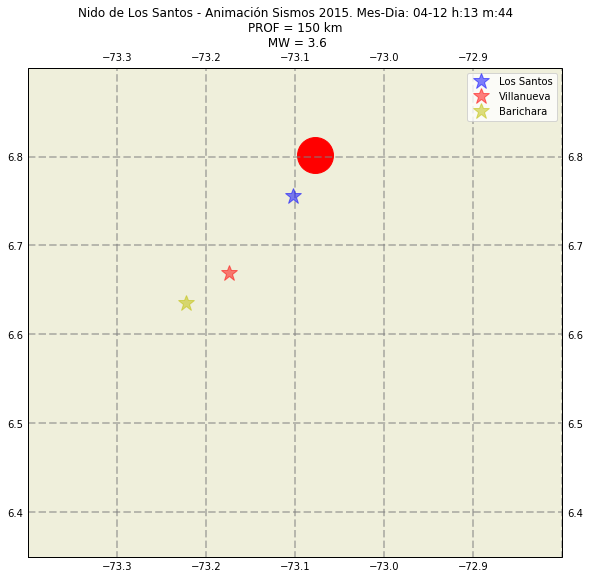

2015-04-20h22-11


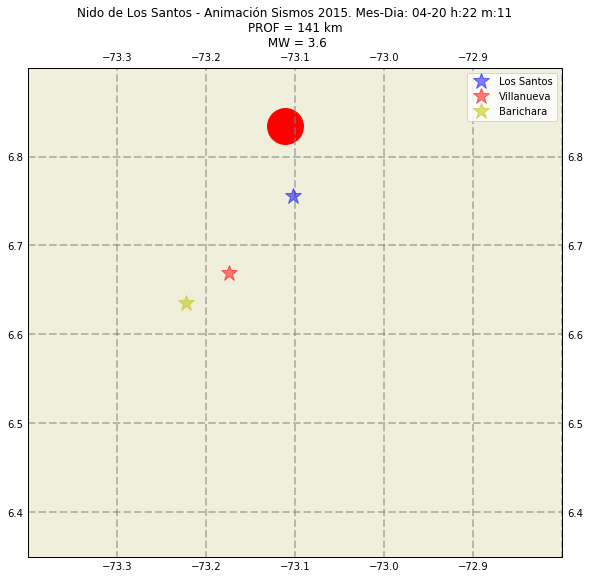

2015-04-27h06-36


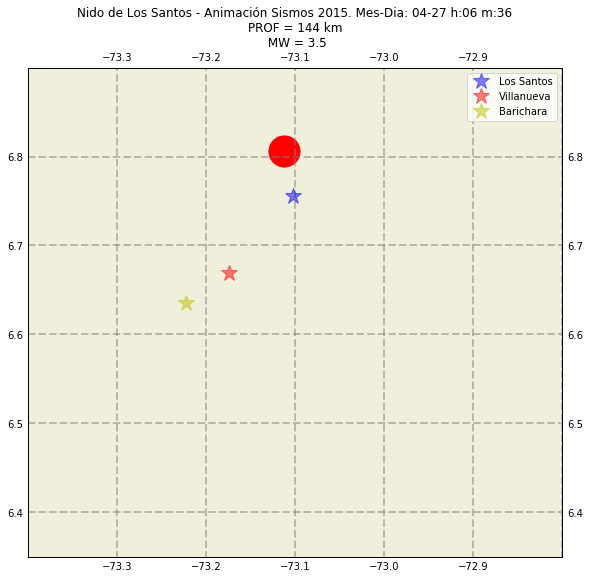

2015-04-27h22-28


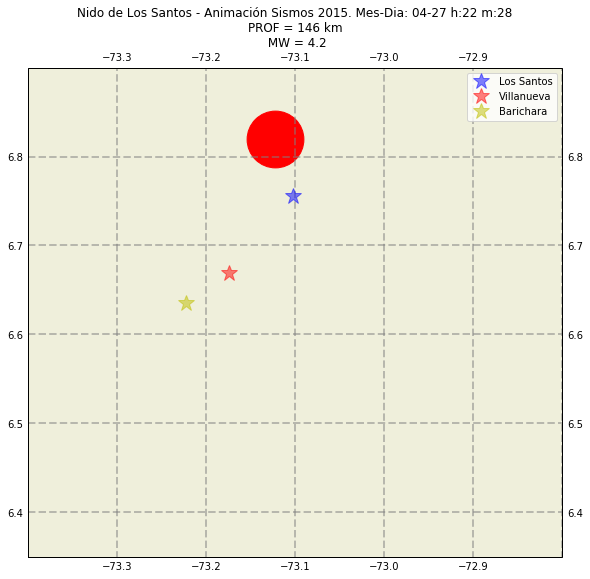

2015-05-02h09-51


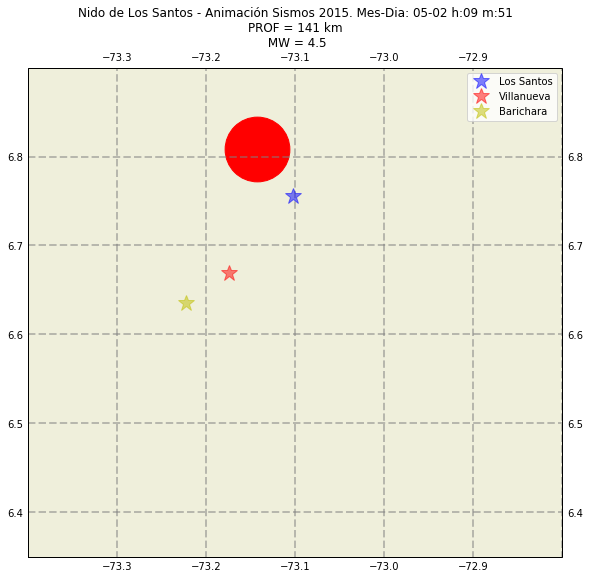

2015-05-04h02-10


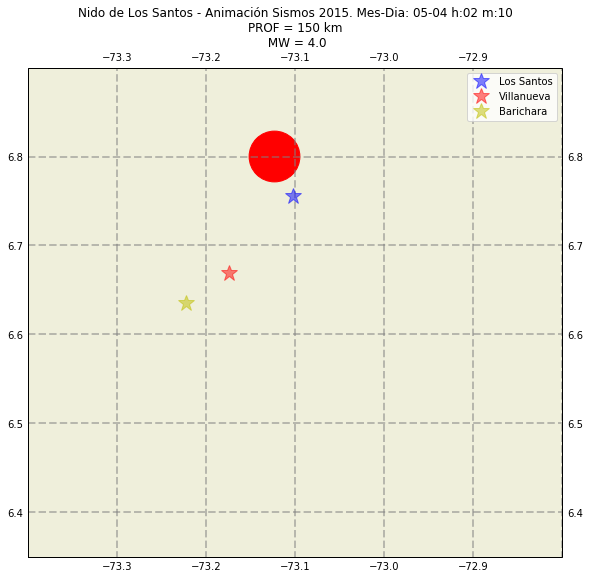

2015-05-07h11-49


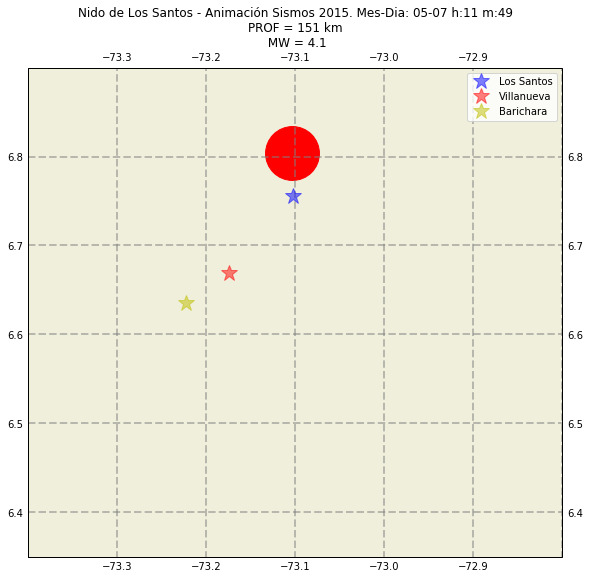

2015-05-12h15-32


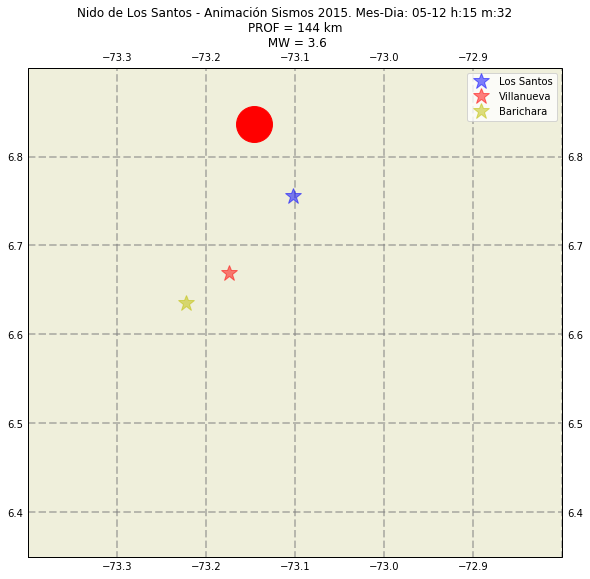

2015-05-18h04-55


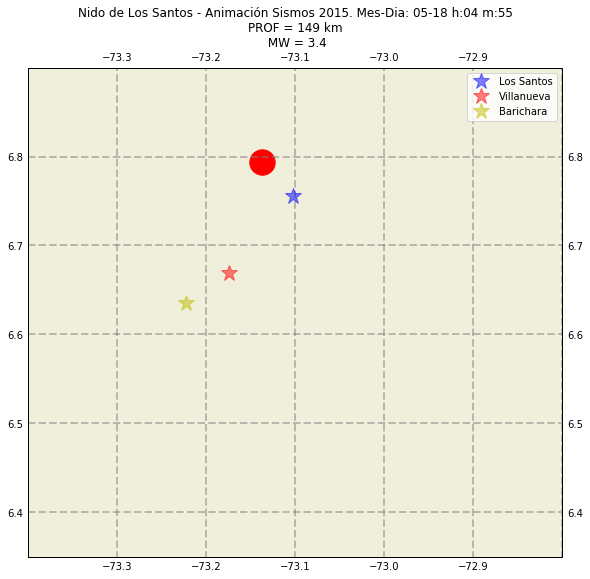

2015-05-23h07-55


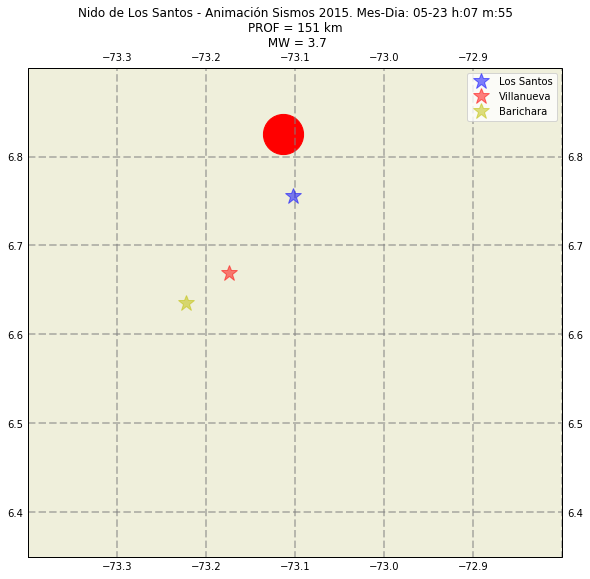

2015-05-31h12-34


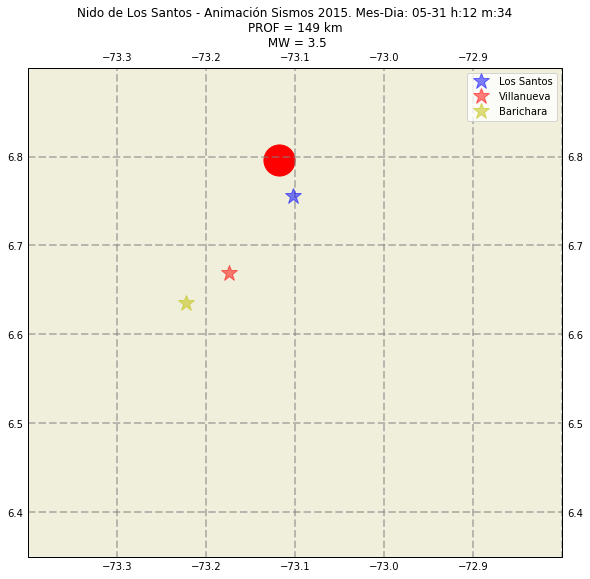

2015-06-10h23-46


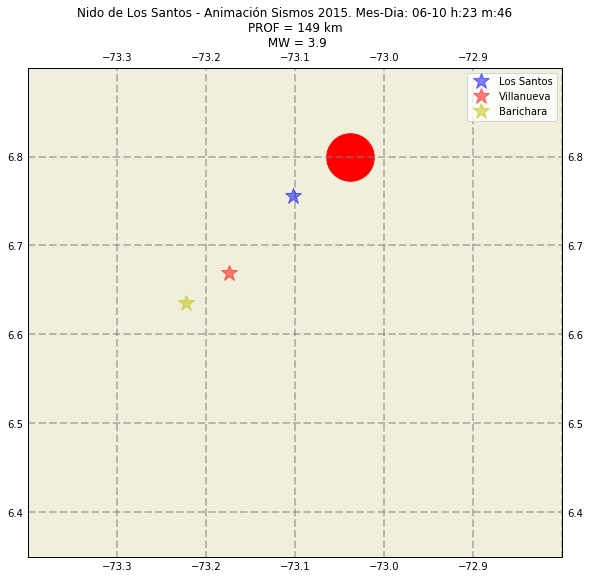

2015-06-11h05-35


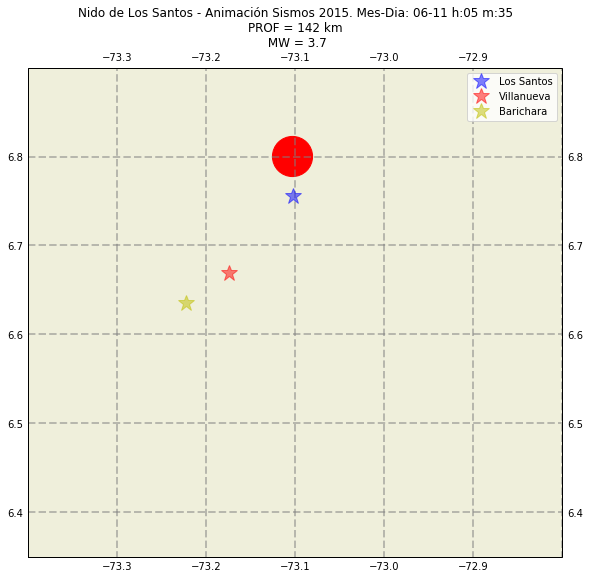

2015-06-13h15-46


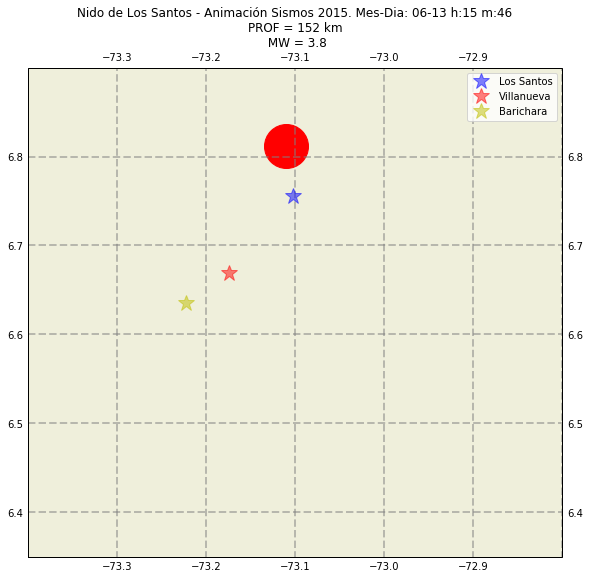

2015-06-14h19-13


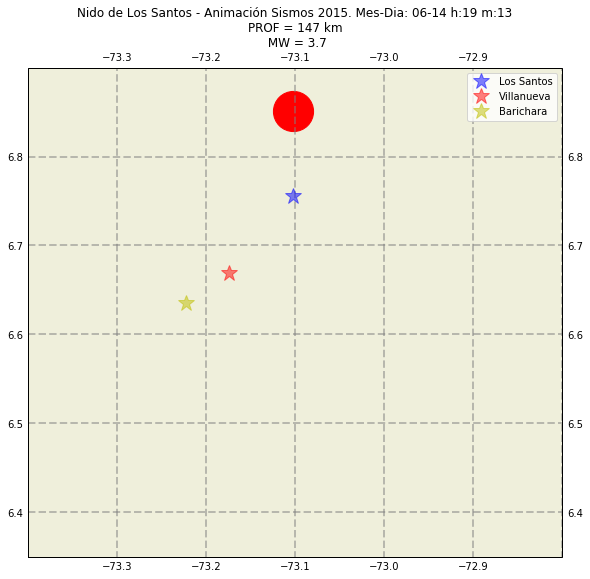

2015-06-15h11-34


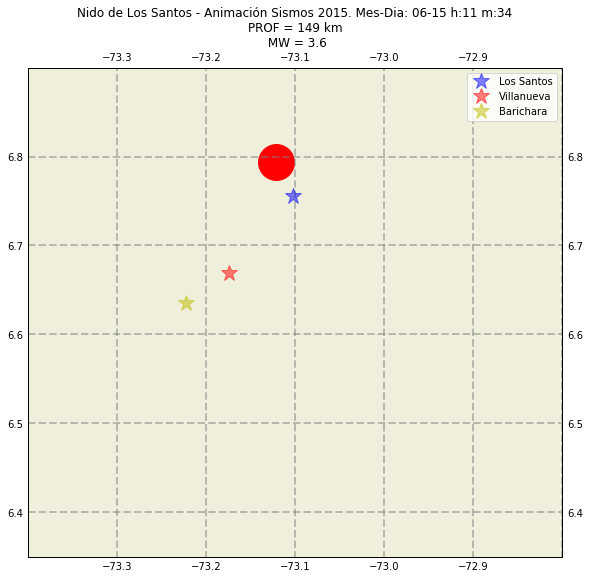

2015-06-19h09-07


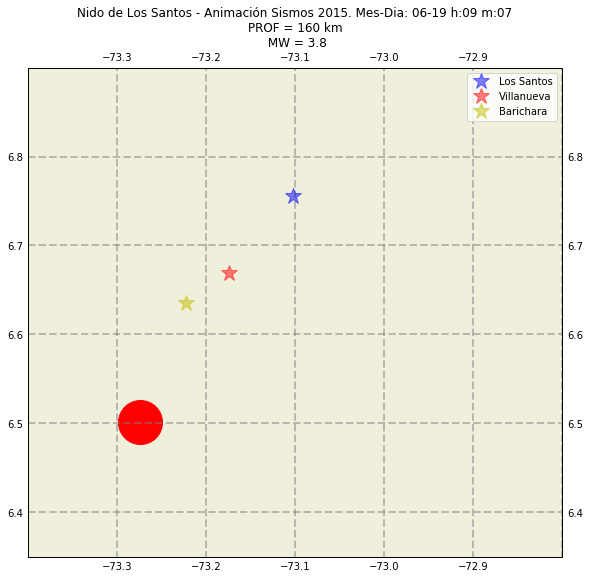

2015-06-20h09-09


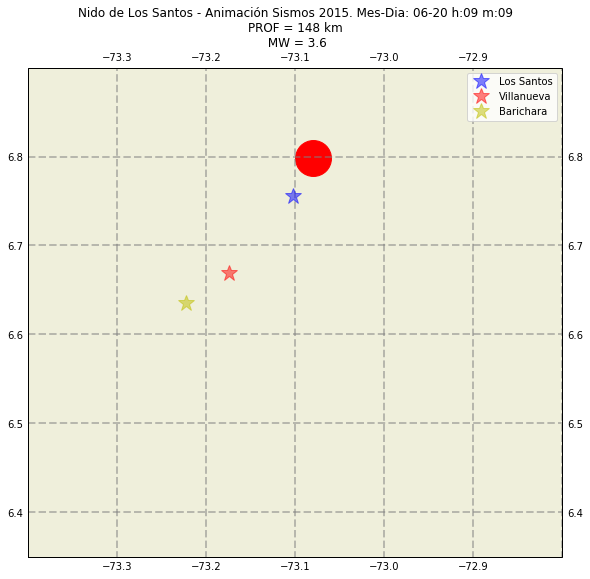

2015-06-22h00-25


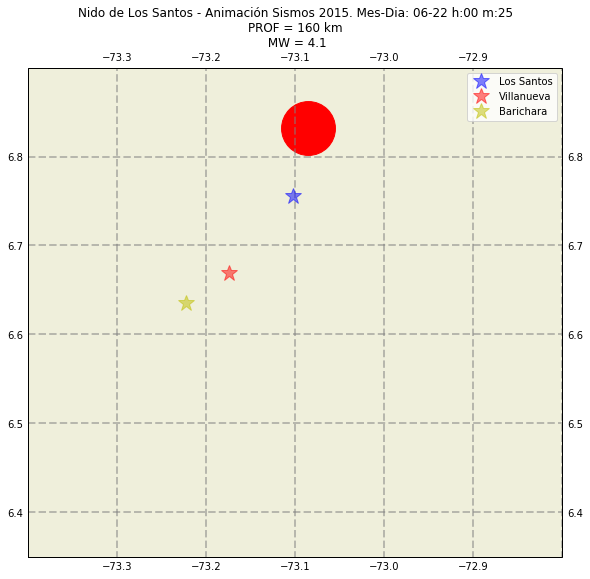

2015-06-23h12-42


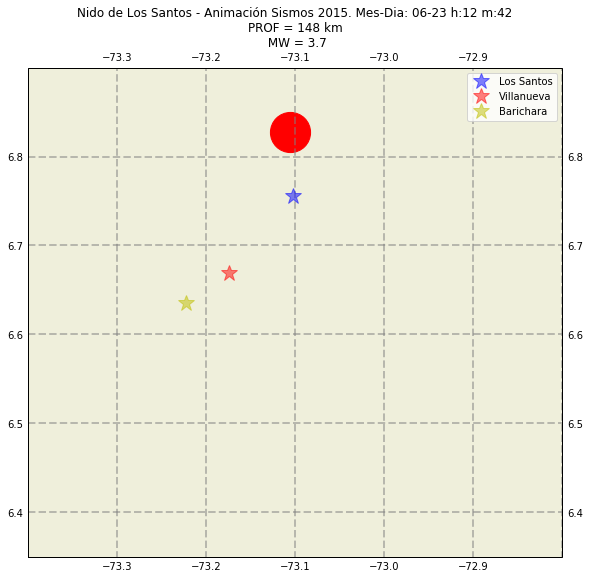

2015-06-29h22-24


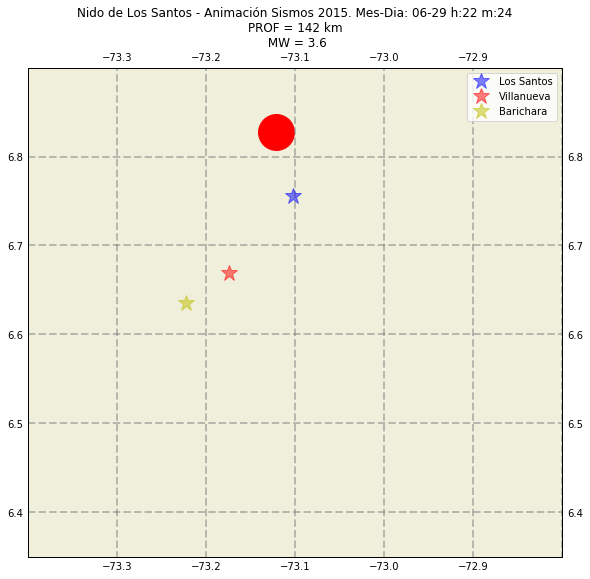

2015-07-01h05-55


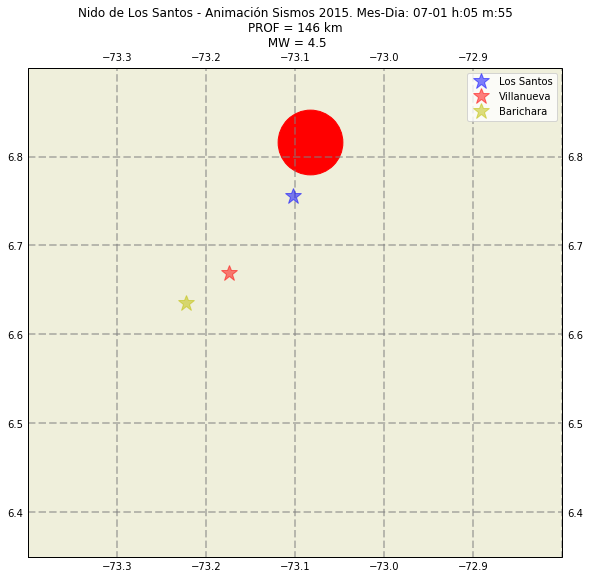

2015-07-01h06-23


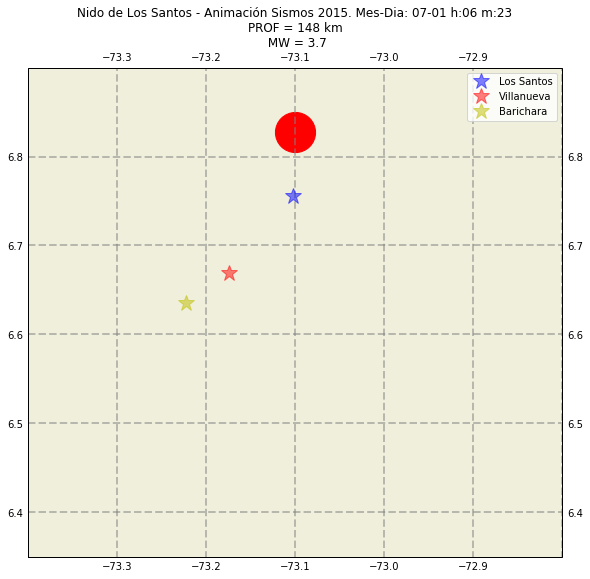

2015-07-03h15-25


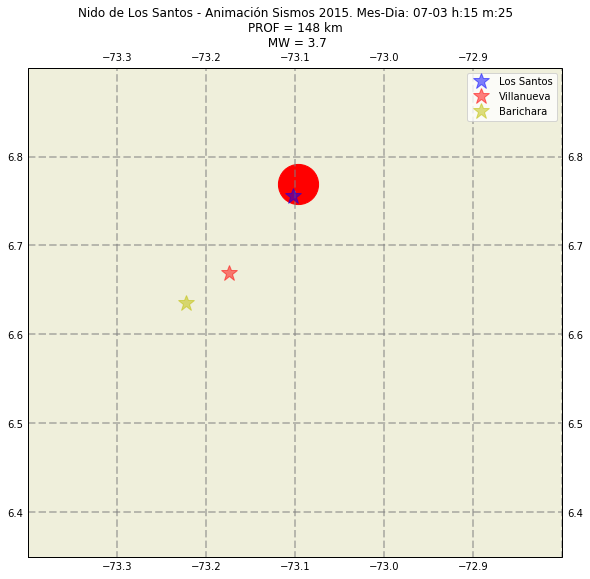

2015-07-05h08-54


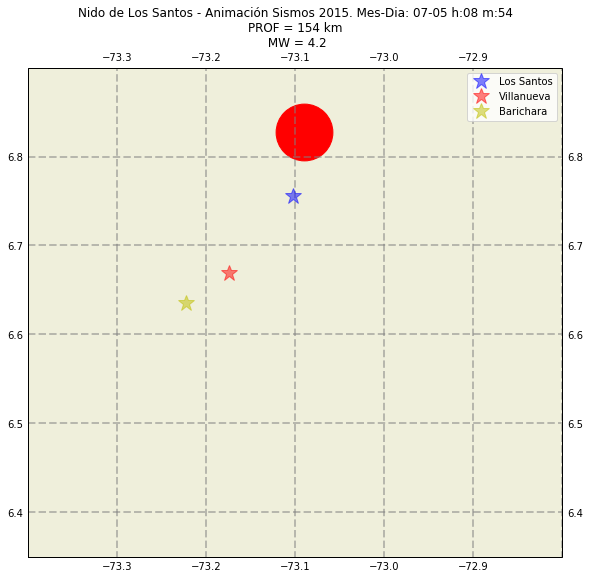

2015-07-14h05-46


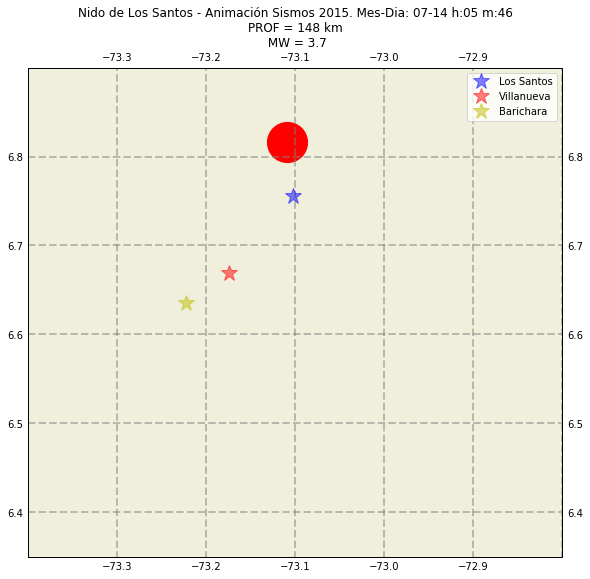

2015-07-14h23-26


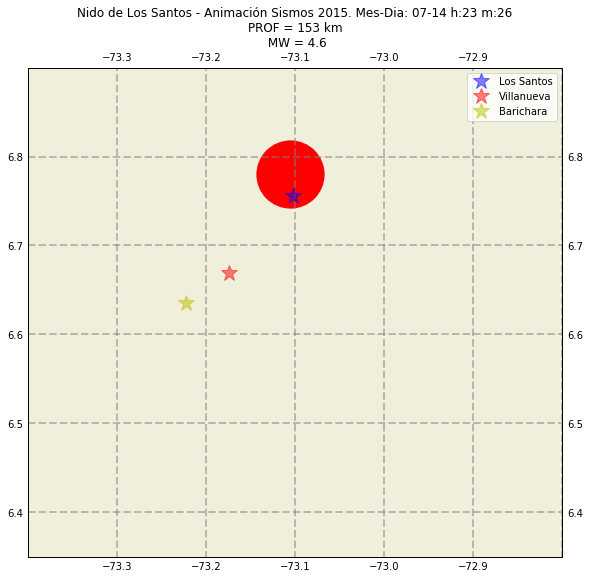

2015-07-18h12-34


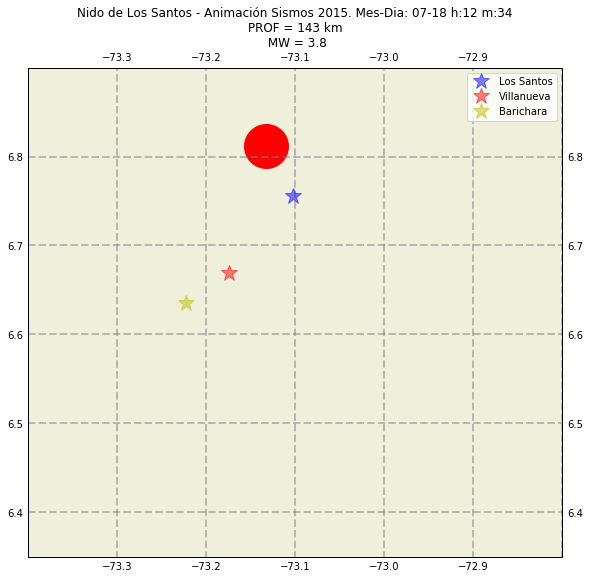

2015-07-26h09-35


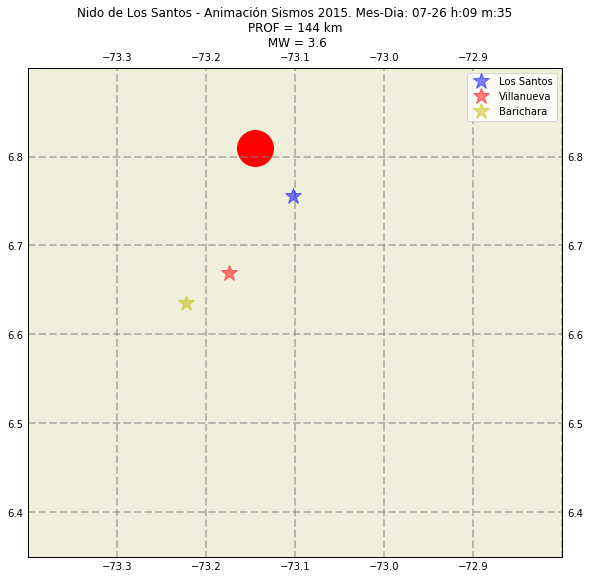

2015-07-26h10-13


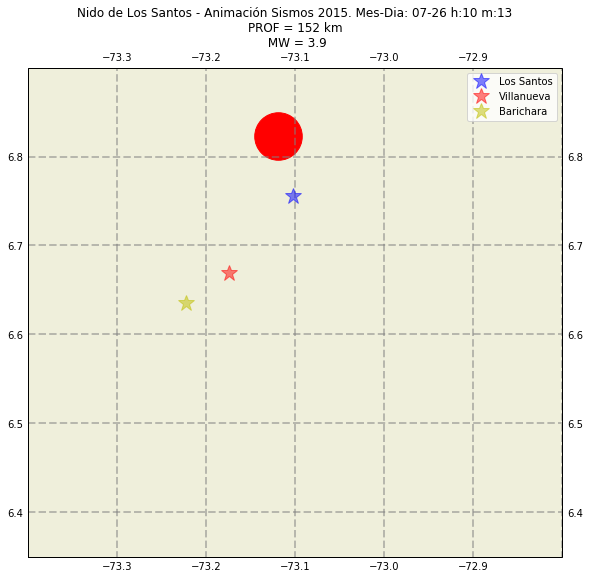

2015-07-26h13-09


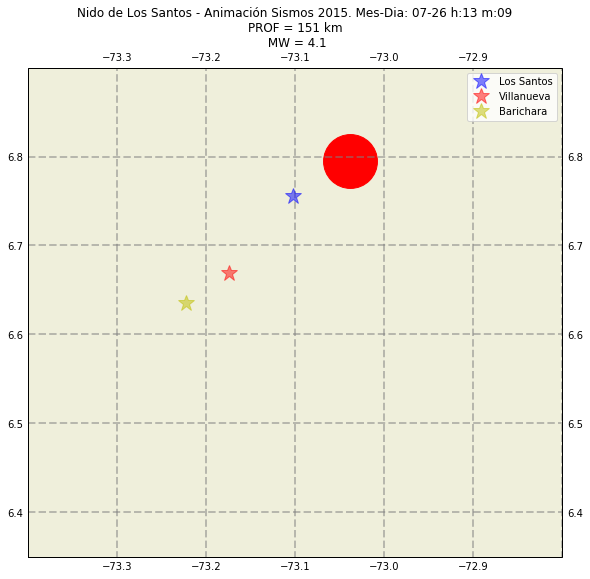

2015-07-27h06-57


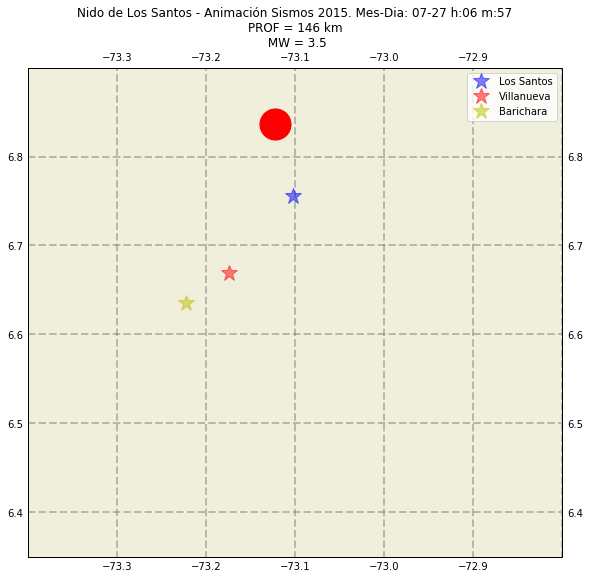

2015-07-29h10-37


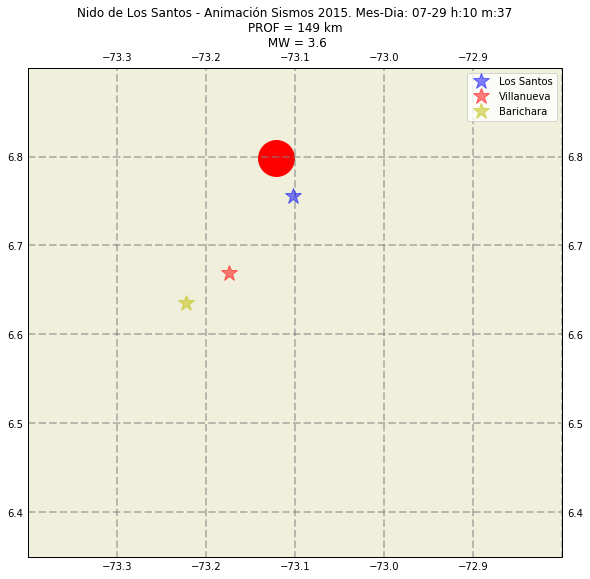

2015-08-04h15-55


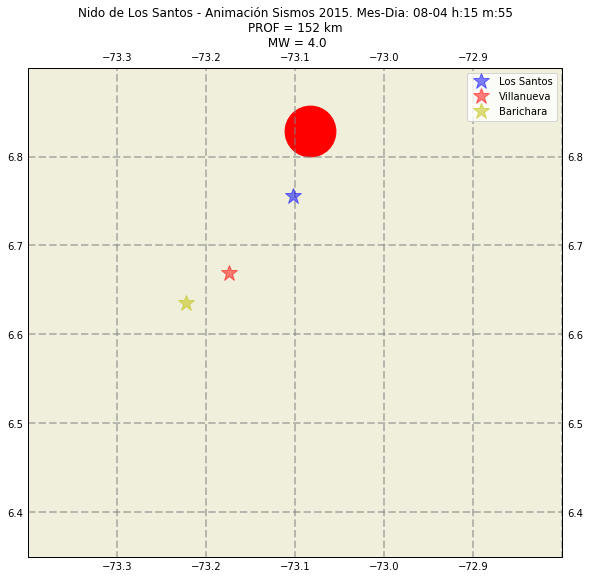

2015-08-05h07-43


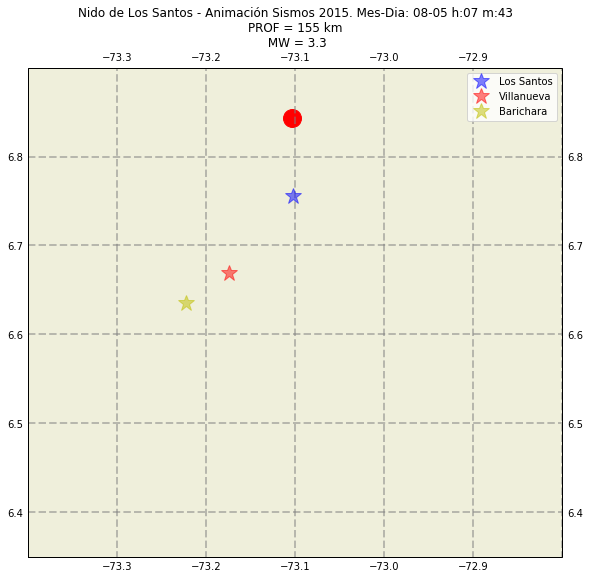

2015-08-06h21-41


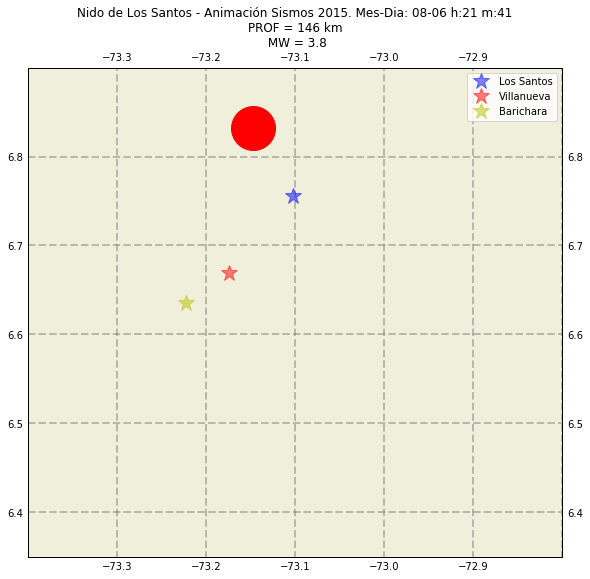

2015-08-10h16-02


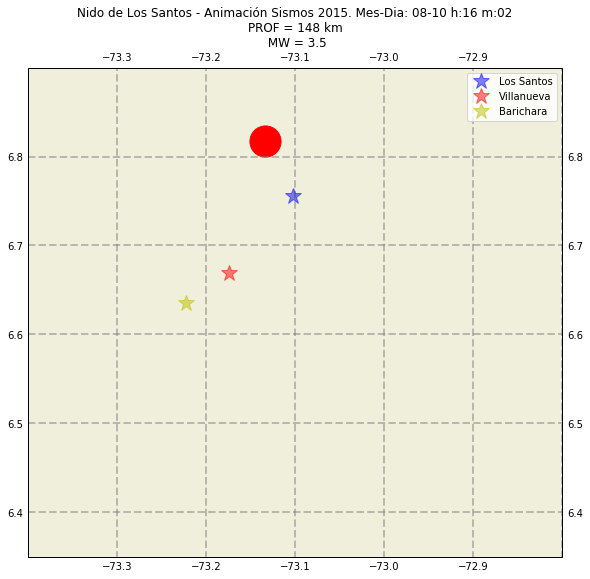

2015-08-10h19-17


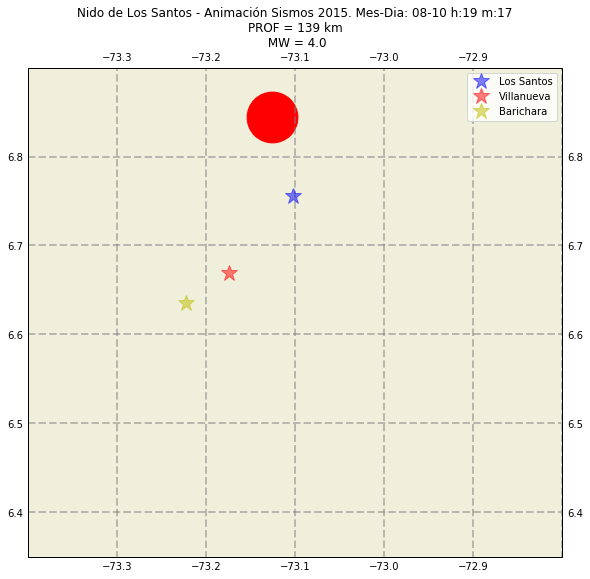

2015-08-12h20-16


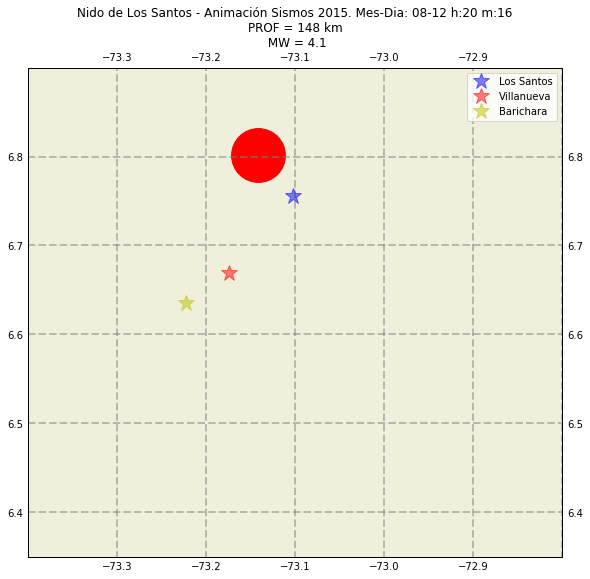

2015-08-23h08-43


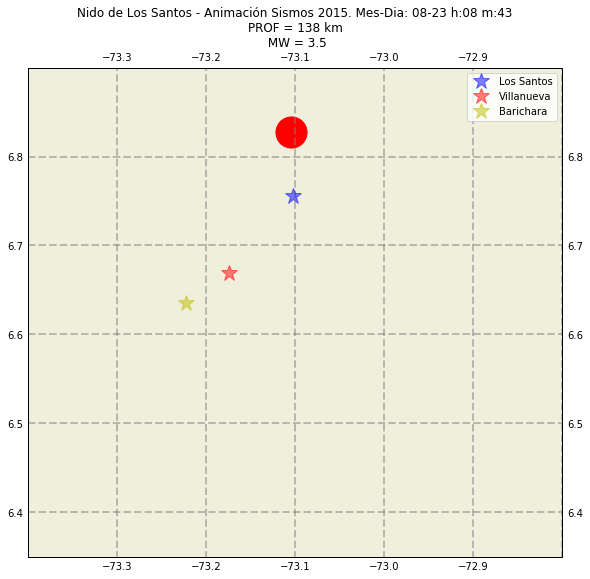

2015-08-24h07-04


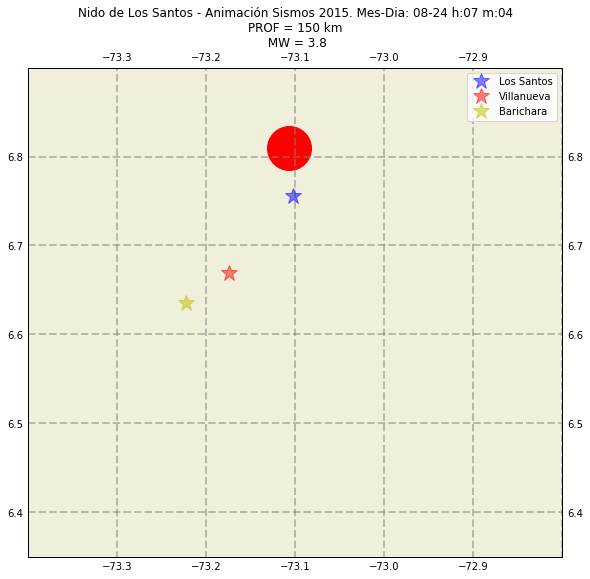

2015-08-29h14-22


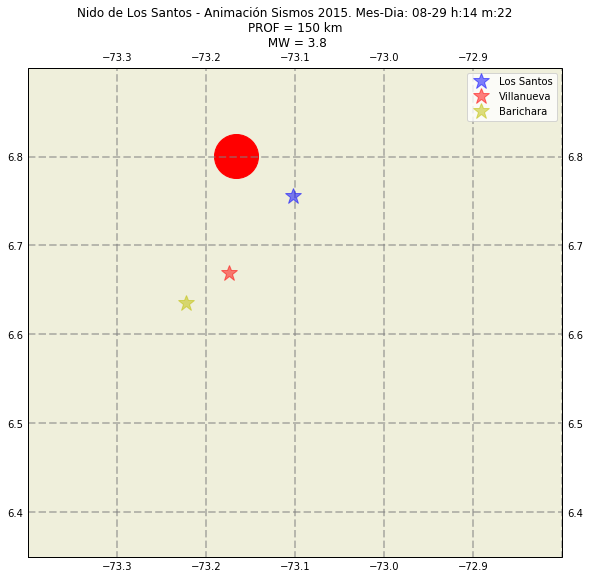

2015-08-30h15-13


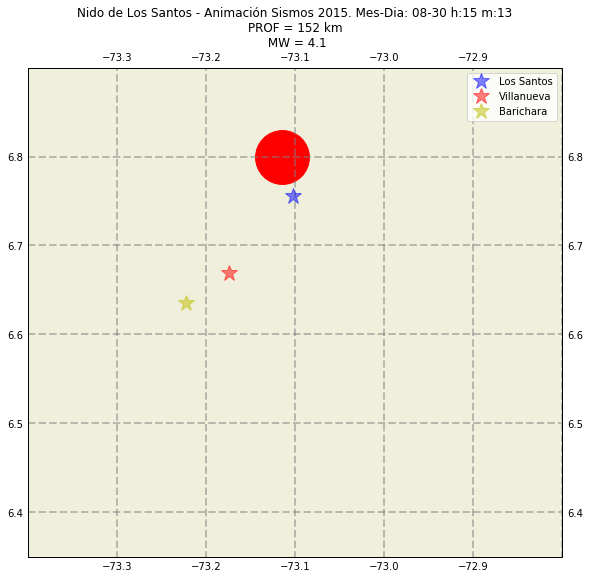

2015-09-01h11-32


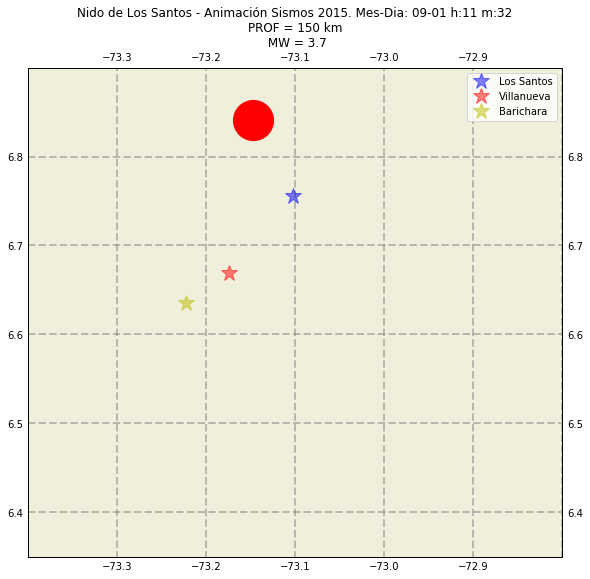

2015-09-07h15-55


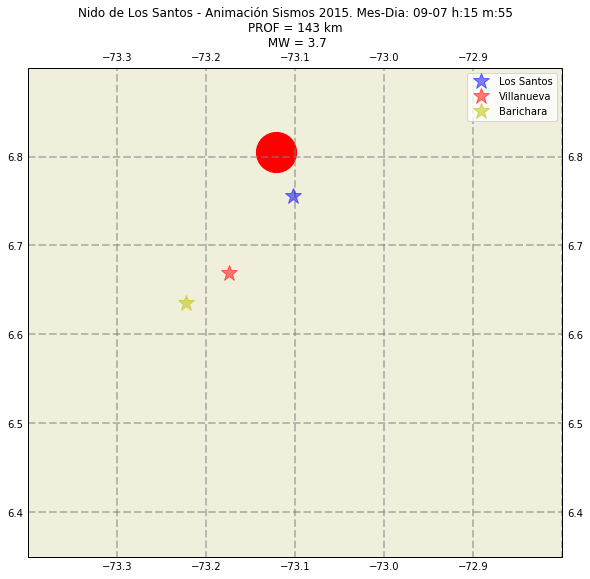

2015-09-07h17-35


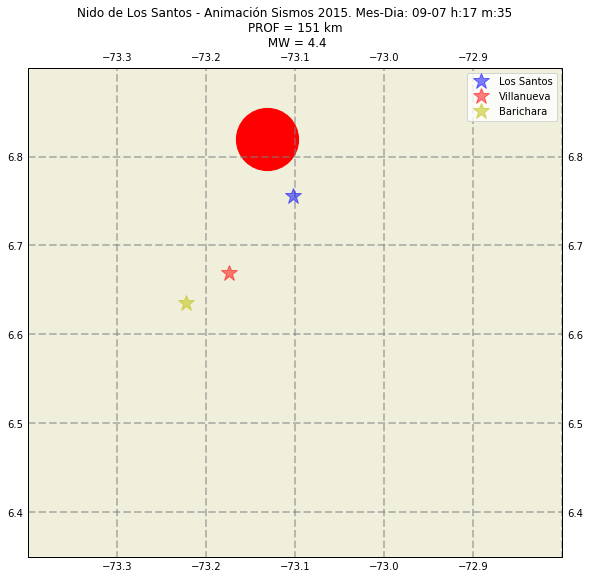

2015-09-12h14-25


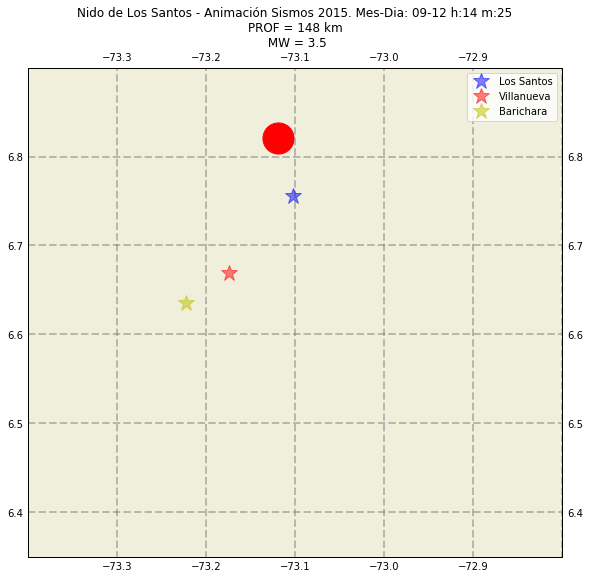

2015-09-15h04-16


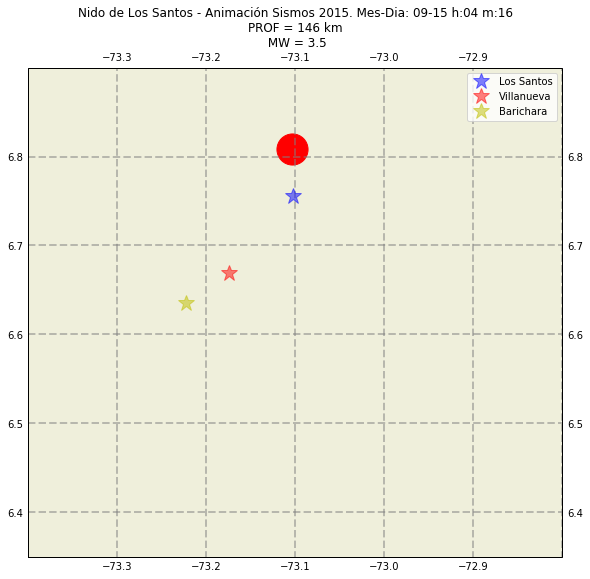

2015-09-20h14-29


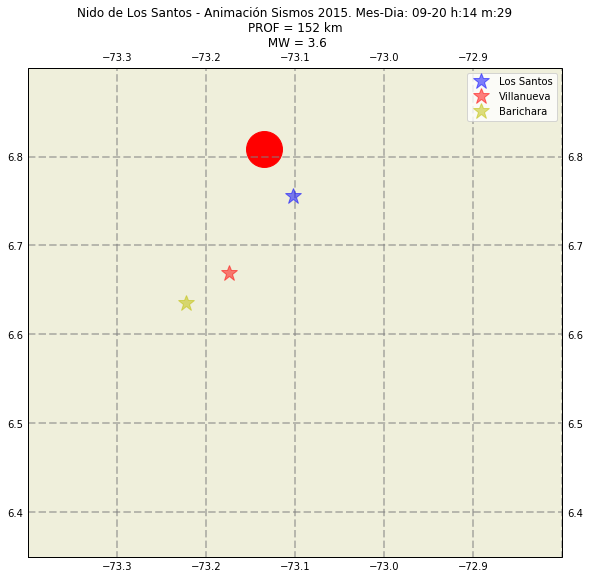

2015-09-23h18-47


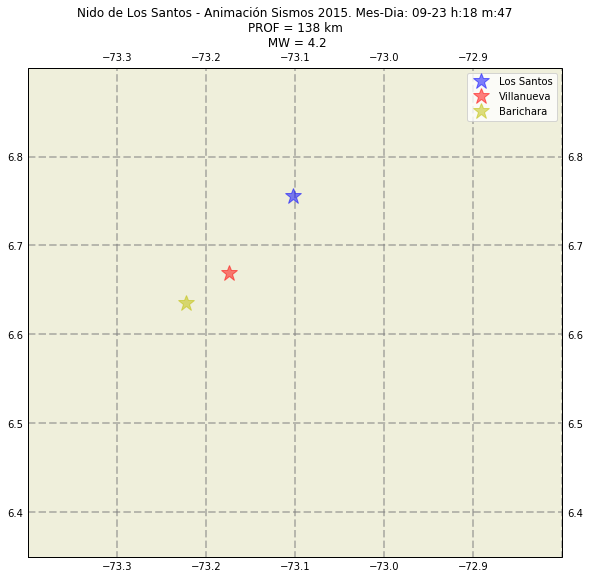

2015-10-01h01-59


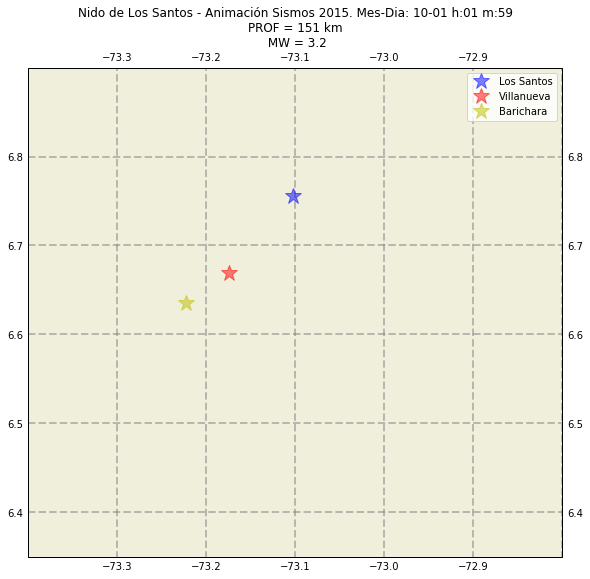

2015-10-02h13-57


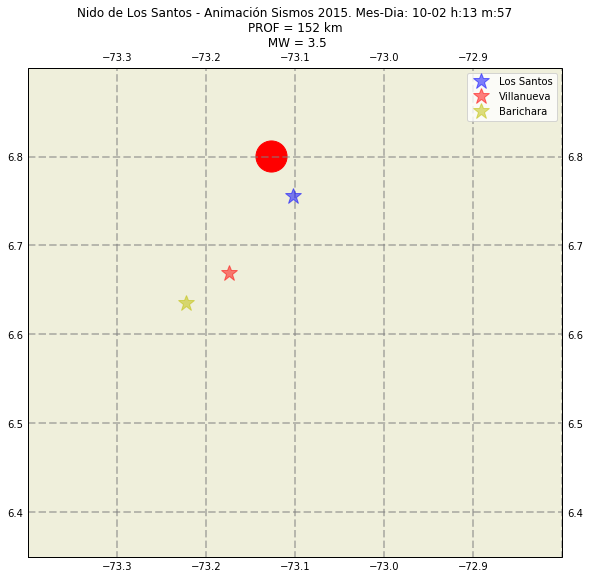

2015-10-05h21-20


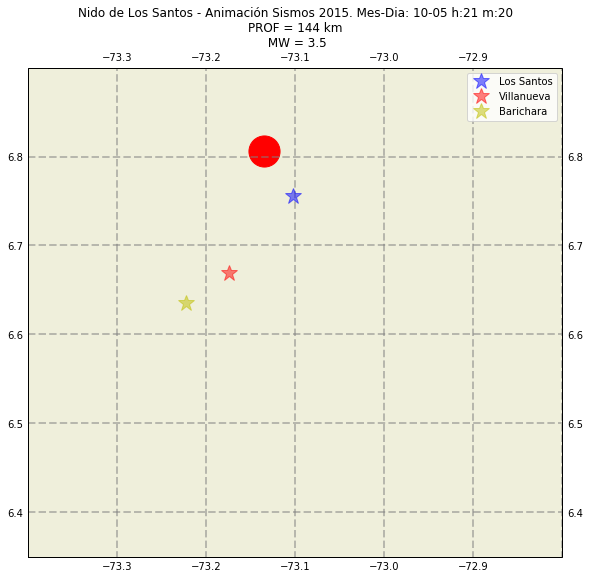

2015-10-06h19-53


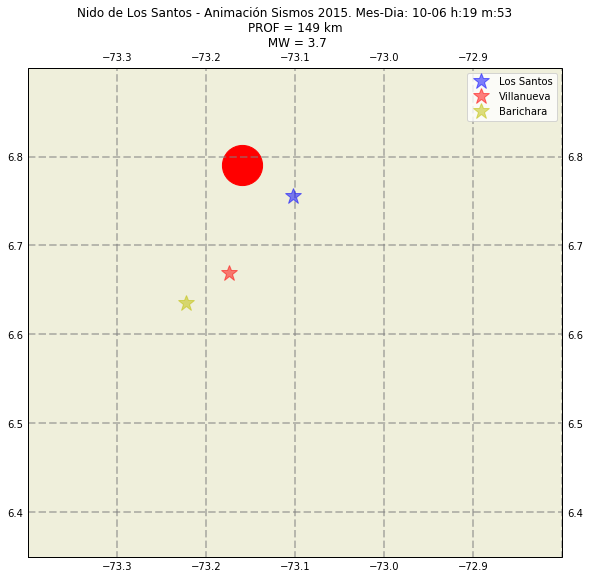

2015-10-07h14-35


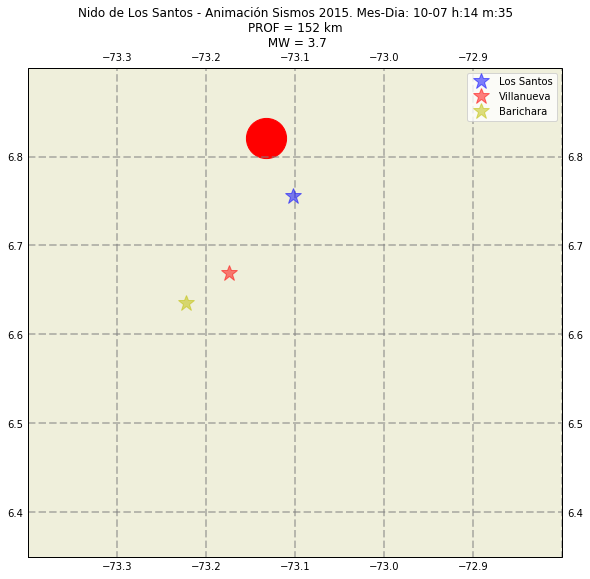

2015-10-17h05-53


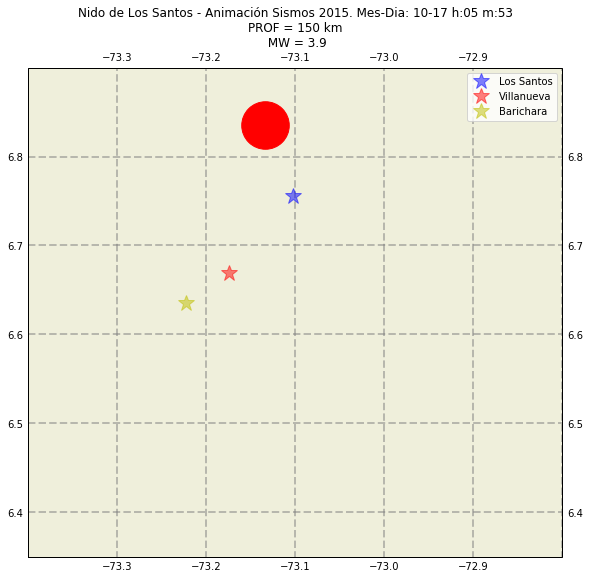

2015-10-21h09-00


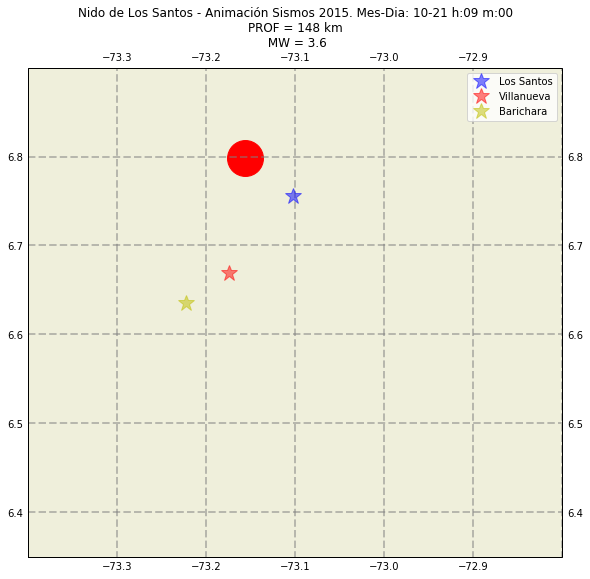

2015-10-26h15-37


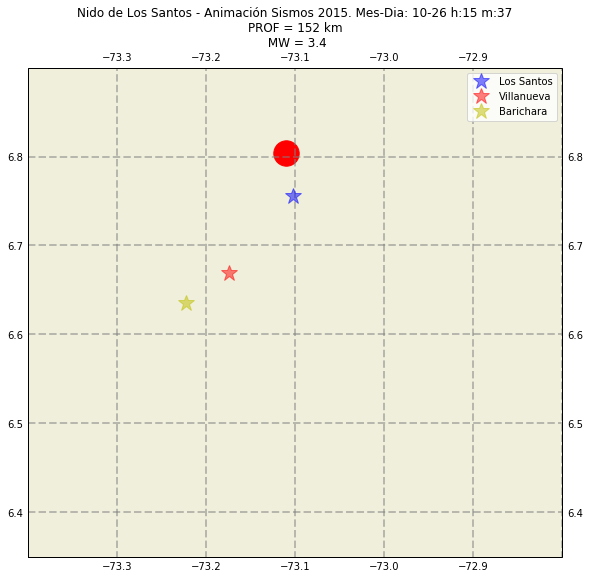

2015-10-29h00-34


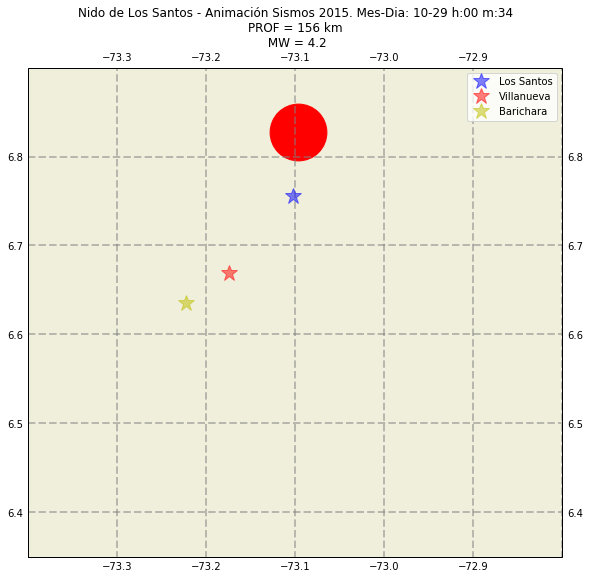

2015-10-29h22-40


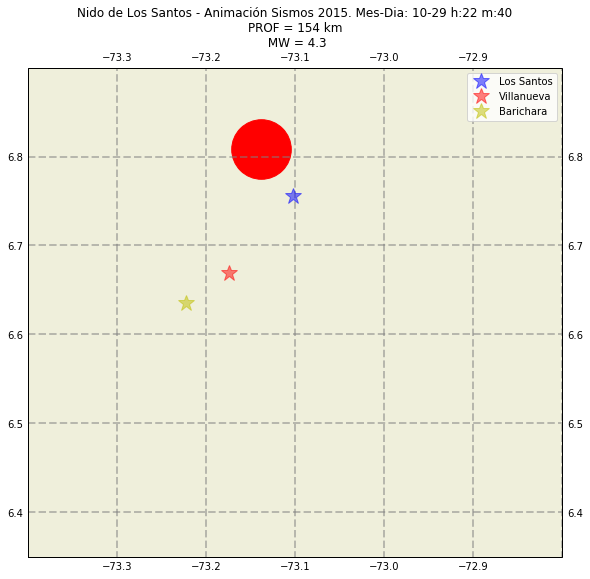

2015-11-08h18-50


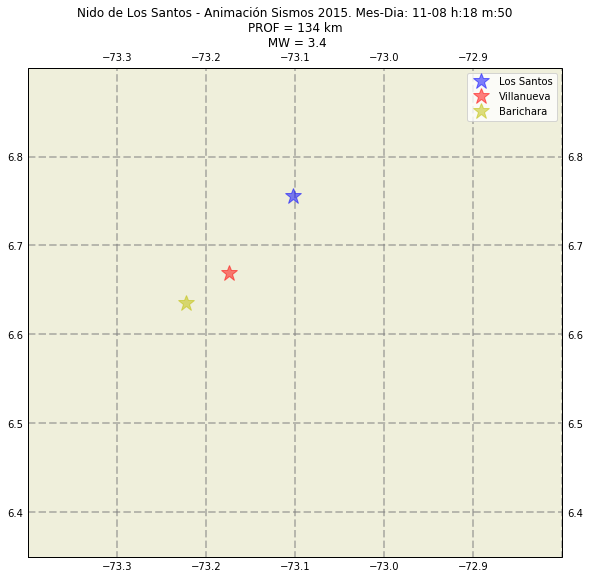

2015-11-15h13-33


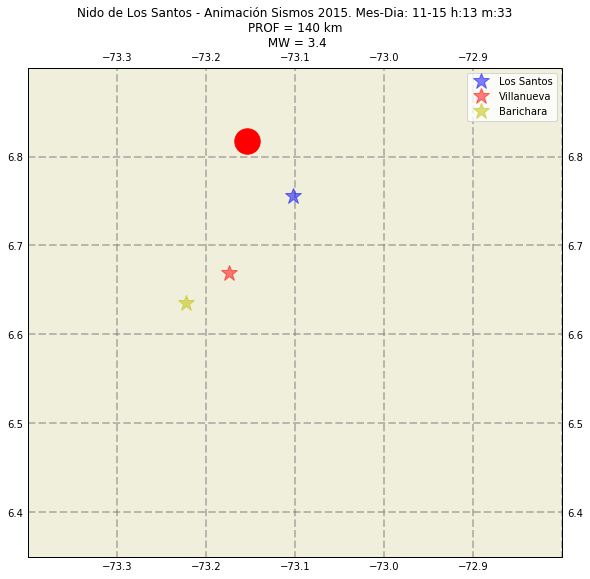

2015-11-19h20-19


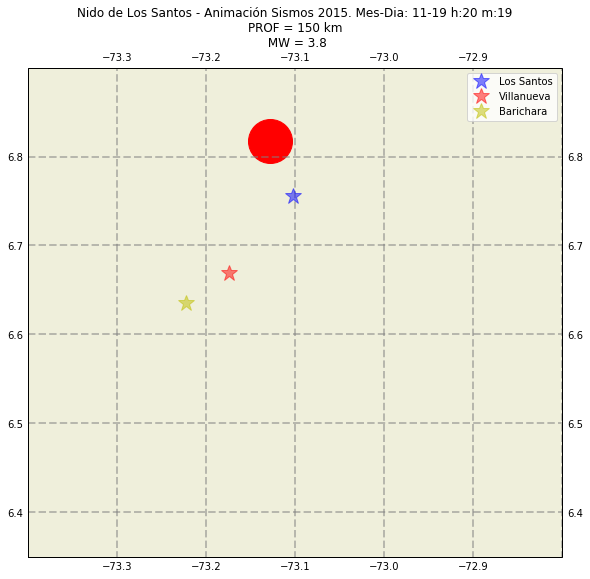

2015-11-26h13-40


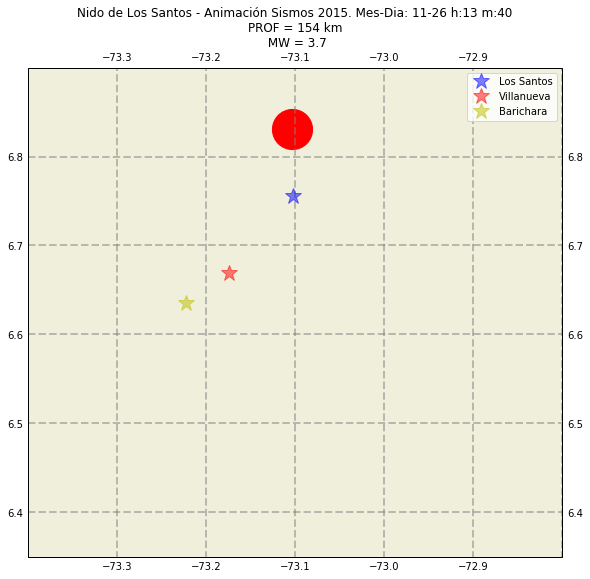

2015-11-28h17-45


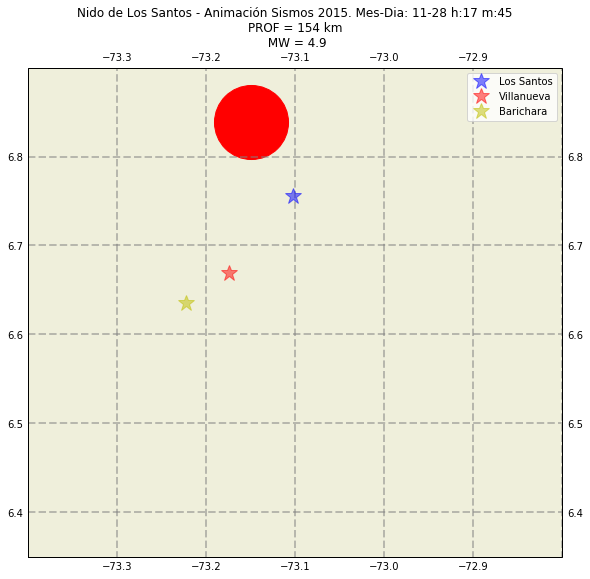

2015-11-30h21-51


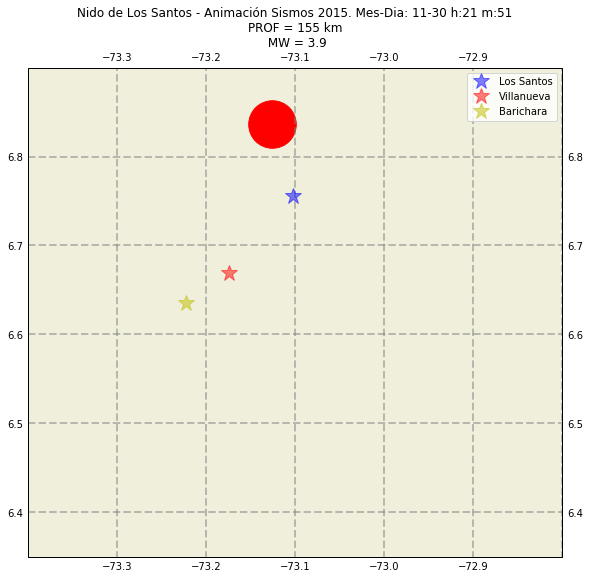

2015-12-02h20-03


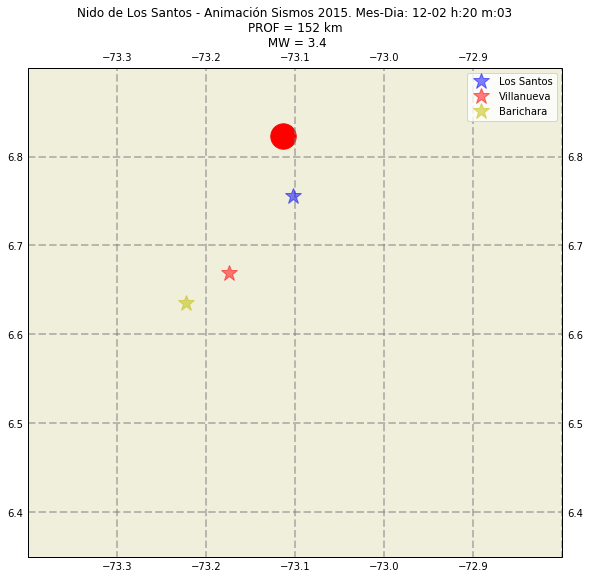

2015-12-07h19-26


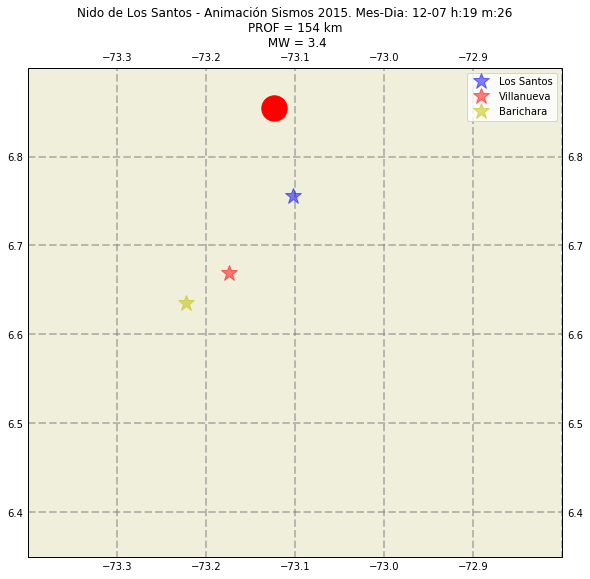

2015-12-09h18-10


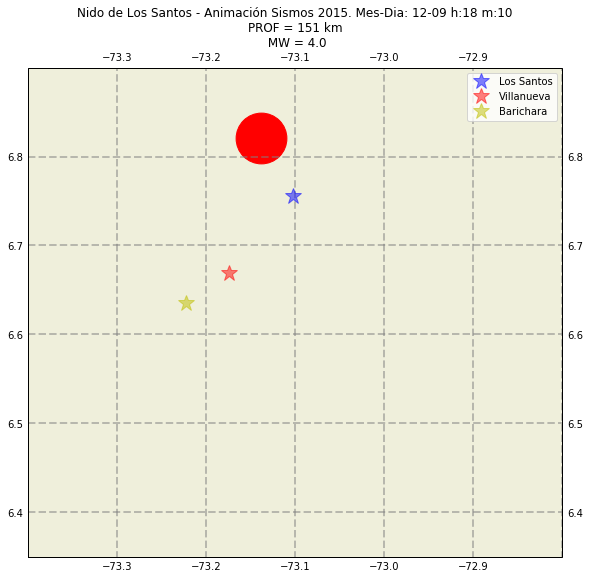

2015-12-24h19-13


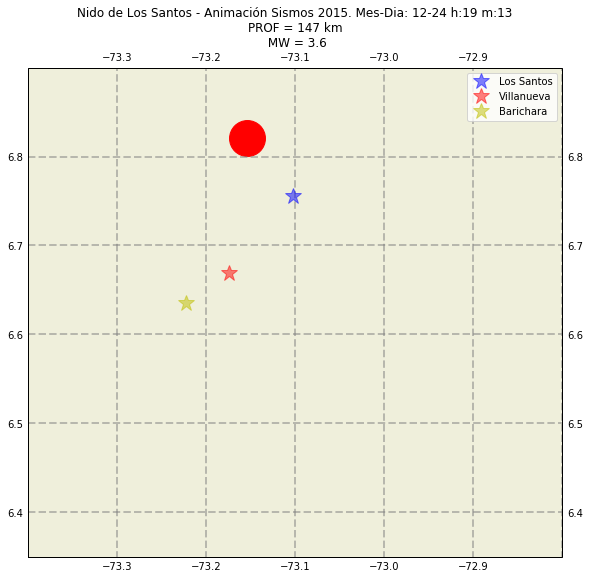

2015-12-26h13-04


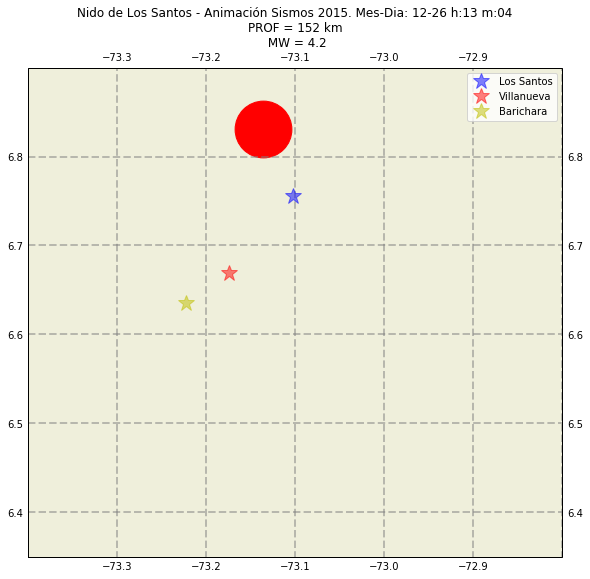

2015-12-29h20-10


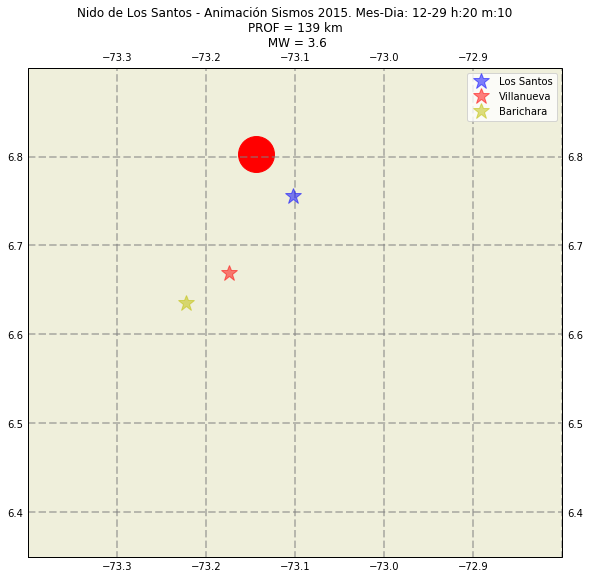

IndexError: index 99 is out of bounds for axis 0 with size 99

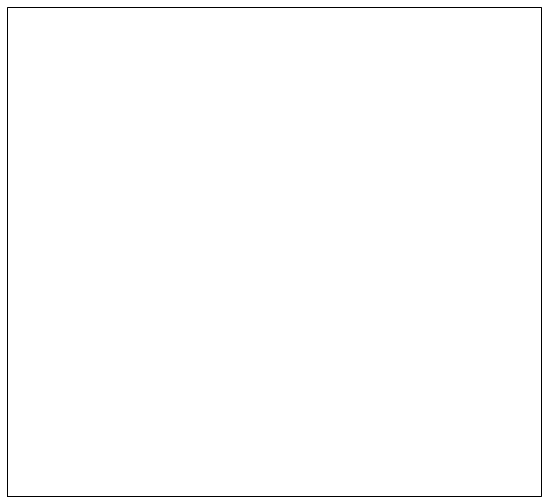

In [106]:
# generacion de imagenes


maxMg = magm.max()
minMg = magm.min()



for k in range(0,100):
    fig = plt.figure(figsize=(12,9))
    ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
    ax.set_extent([-73.4, -72.8, 6.35, 6.9])

    num = 0
    num = ((magm[k]-minMg)/(maxMg-minMg))*10000

    ax.coastlines()
    ax.scatter(lonm[k],latm[k],s=num, c='red', cmap='rainbow')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=2, color='gray', alpha=0.5, linestyle='--')

    san_lon, san_lat = -73.1023, 6.7557
    vill_lon, vill_lat = -73.1740, 6.6695
    bar_lon, bar_lat = -73.223, 6.6358

    ax.plot(san_lon, san_lat, 'b*', markersize=17, alpha=0.5, label='Los Santos')
    ax.plot(vill_lon, vill_lat, 'r*', markersize=17, alpha=0.5, label='Villanueva')
    ax.plot(bar_lon, bar_lat, 'y*', markersize=17, alpha=0.5, label='Barichara')
    
    
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.RIVERS)
    
    stir = str(horam[k])
    stir = stir.replace(':','-',1)
    stir2 = str(fecham[k])
    print(stir2[:10]+'h'+stir[:5])
    ax.set_title("Nido de Los Santos - Animación Sismos 2015. Mes-Dia: %s\nPROF = %i km\n MW = %2.1f\n "%(stir2[5:10]+" h:"+stir[:2]+" m:"+stir[3:5],depm[k],magm[k]))  
    ax.legend()
    plt.savefig("img\sismo"+str(k)+".png")
    plt.show()


### Código generación video .avi a partir de las fotos

In [ ]:
# Generacion de video 

import cv2
import os
import natsort 


image_folder = 'img'
video_name = 'vid.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
# images = images.sort()

images = natsort.natsorted(images)
# print(natsort.natsorted(images,reverse=False))

frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape


video = cv2.VideoWriter(video_name, 1, 5, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

### Código para generar los vectores de comparación de picado de sismos

C:\Users\Ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


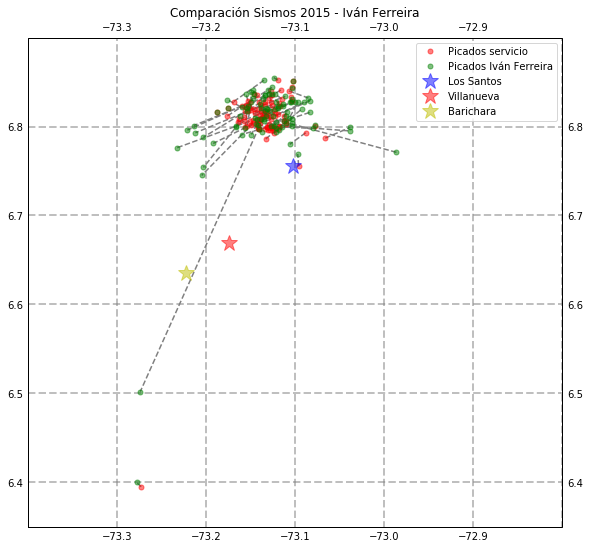

In [117]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_extent([-65, -80, -5, 13])
#ax.set_extent([-73.2, -73.05, 6.75, 6.9])
ax.set_extent([-73.4, -72.8, 6.35, 6.9])
#ax.set_extent([-180, 180, -90, 90])
ax.coastlines()

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
plt.plot([lons,lonm], [lats, latm],
         color='gray', linestyle='--',
         transform=ccrs.PlateCarree()
         )
ax.plot(lons,lats,'ro', markersize =5, label="Picados servicio", alpha=0.5)
ax.plot(lonm,latm,'go', markersize =5, label="Picados Iván Ferreira",alpha=0.5)
san_lon, san_lat = -73.1023, 6.7557
vill_lon, vill_lat = -73.1740, 6.6695
bar_lon, bar_lat = -73.223, 6.6358

ax.plot(san_lon, san_lat, 'b*', markersize=17, alpha=0.5, label='Los Santos')
ax.plot(vill_lon, vill_lat, 'r*', markersize=17, alpha=0.5, label='Villanueva')
ax.plot(bar_lon, bar_lat, 'y*', markersize=17, alpha=0.5, label='Barichara')


ax.set_title("Comparación Sismos 2015 - Iván Ferreira\n")
ax.legend()
plt.savefig("lineaComparacionSismos.png")
plt.show()